How often we can do a NuSTAR DEM will be limited by the counts observed in our highest energy range. We need good statistics (>10 actual counts) in each interval. 

Note: this specifically refers to the COUNTS RECORDED BY NUSTAR – due to low livetime, this is much lower than the estimated incident event rate. 

Specifically, we need to select time intervals where there are sufficient counts 
- in our highest energy range
- in the selected region
AND
- of the correct event grade
AND/OR
- after pile-up correction (subtraction of unphysical grades)


Properly checking if there are sufficient counts is fairly computationally expensive, because the grade and region selection need to be done via creation of the actual NuSTAR spectral data products for each time interval (takes a while). This needs to be done anyway (to do DEMs), but we want to avoid making spectral data products for intervals with not enough counts just to check. So, we use methods in time_interval_selection.py to estimate counts in a given interval using the full-detector .evt and .hk files (before time, grade, region selection). 

Here, we show an example of how this is done for a sample NuSTAR orbit. 

First, edit the paths in the following cell to point to the correct locations on your system. 

In [1]:
#Path to top-level do-dem directory - edit for your system.
path_to_dodem = '/Users/jessieduncan/do-dem/'
from sys import path as sys_path
sys_path.append(path_to_dodem+'/dodem/')

#do-dem
import time_interval_selection as tis


#Basics
import numpy as np
import importlib
import matplotlib.pyplot as plt
import datetime
import os
import pathlib
os.getcwd()

'/Users/jessieduncan/do-dem'

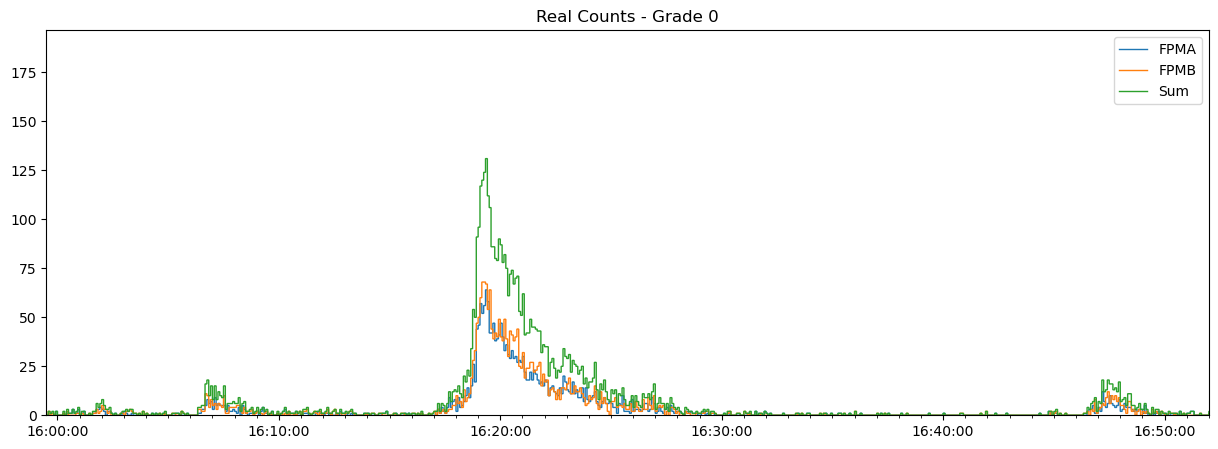

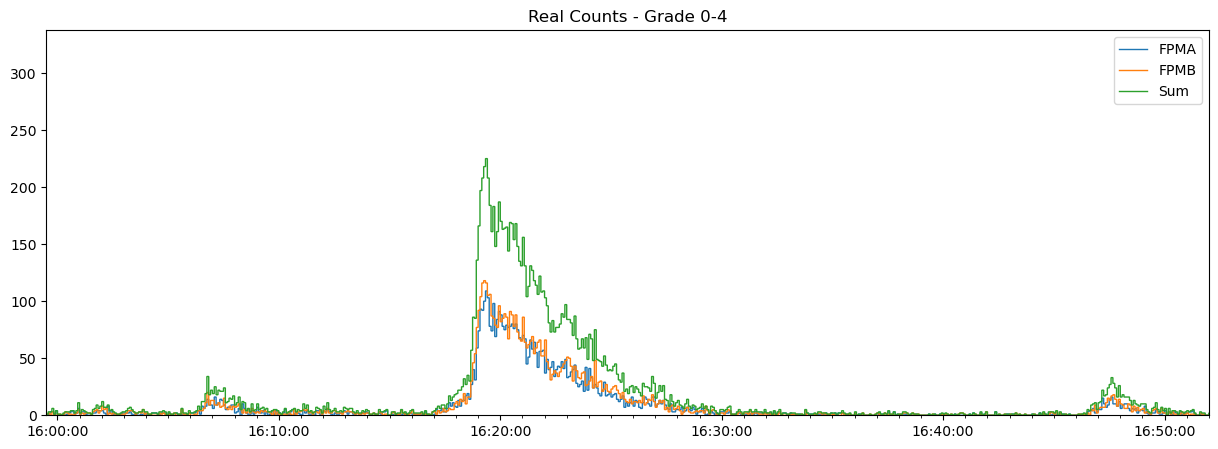

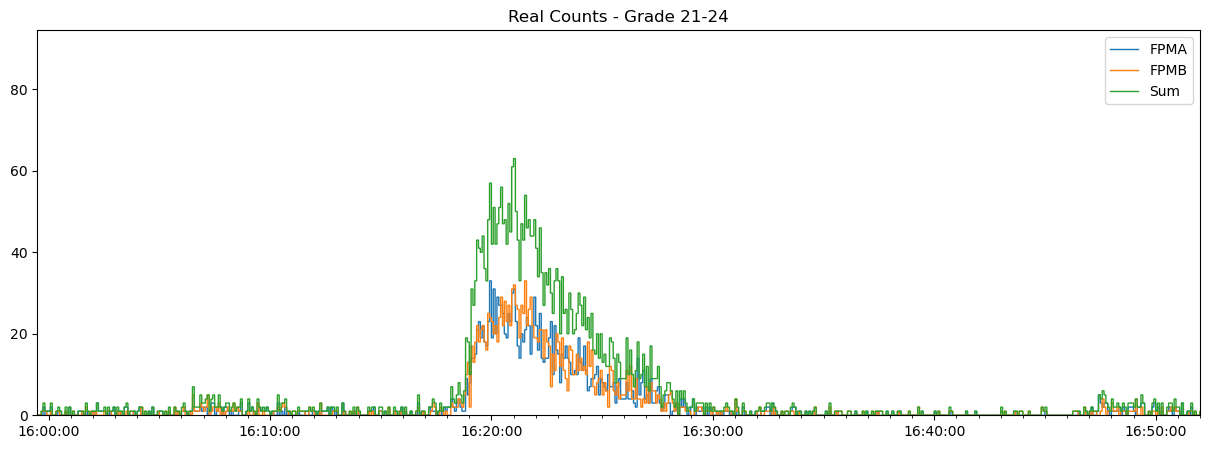

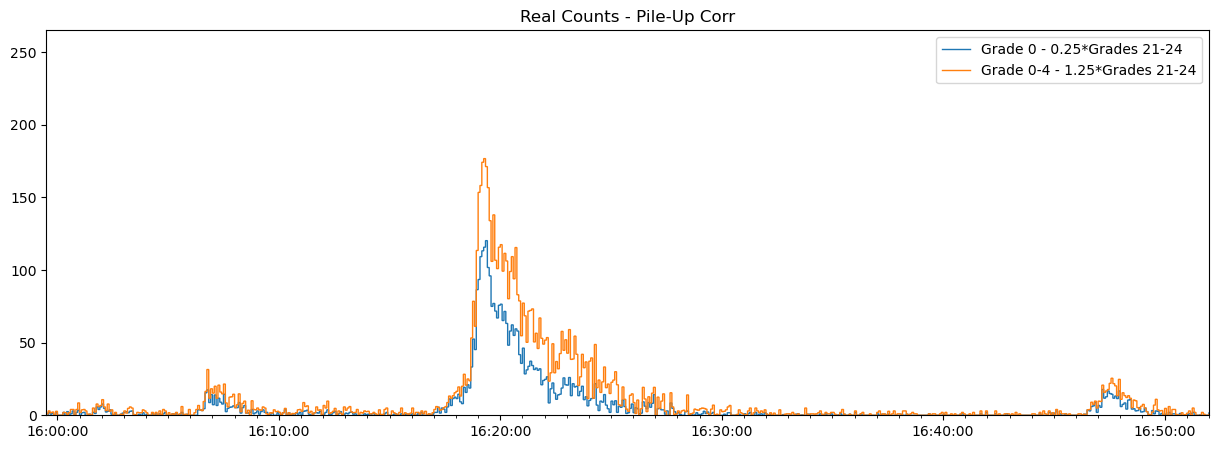

In [2]:
#First, make real-counts lightcurves to visualize the time evolution + examine statistics 
#(this is optional but usually interesting. )

#Name your working directory
working_dir='./initial_dem/'

#Make a new working directory for prepped data/etc if it doesn't yet exist
save_path = pathlib.Path(working_dir)
if not save_path.exists():
    save_path.mkdir()

#Set path to obsid directory - initial pipeline should have been run already.
datapath='/Users/jessieduncan/nustar/may-2018/5_29pixpos/80410201001/'

#Comment second line if you're not using this same example nustar orbit
#Edit it to include only the desired time interval (default- all times in file) once you've run this once
#may 29 orbit 5
#timerange=[datetime.datetime(2018, 5, 29, 22, 22), datetime.datetime(2018, 5, 29, 23, 20)]
#may 29 orbit 4
#timerange=[datetime.datetime(2018, 5, 29, 20, 46), datetime.datetime(2018, 5, 29, 21, 16)]
#may 29 orbit 1
timerange=[datetime.datetime(2018, 5, 29, 15, 59, 30), datetime.datetime(2018, 5, 29, 16, 52)]

erange=[6.,10]

tis.real_count_lightcurves(datapath, timerange, working_dir, erange)

Options when finding intervals:

- __erange__ : set to highest energy range you want to use as a DEM input (higher energies = worse statistics)
- __countmin__: number of real counts you want in each DEM interval.
- __minimum_seconds__: set to a minimum duration for the DEM time intervals (optional, omit to not set a minimum). Effective minimum if not set is 5s (time binning of lightcurves). You could change this too by editing the lightcurve code. 
- __lctype__ : what kind of counts are you going to include? Options:
    
            'grade0' – grade 0 (FPMA,B sum)
            'grade04' - grade 0-4  (FPMA,B sum)
            'corr14' - grade 0 - (1/4)*grades 21-24 (FPMA, B sum)
            'corr54' - grade 0-4 - (5/4)*grades 21-24 (FPMA, B sum)
            
- __fast_min_factor__: factor multiplied by countmin when making an initial estimate of how long an interval is needed (fast method, without region selection). Accounts for the fact that some emission may fall outside the region. Adjust as needed; a larger factor will make this more time-efficient (less chance you'll make spectral data products for any too-small time intervals + have to repeat), but a smaller factor will get you closer to maximally-fine sampling in time.

Note on finding intervals: this is *slow* – it takes between 40 minutes to 3 hours on my machine for a single ~1 hr orbit, due to the need to make NuSTAR spectral data products for each interval. The brighter the source, the finer the time sampling, the longer it takes. But the spectral data products need to be made anyway to do DEMs, so it isn't a waste. 

6 <class 'int'>

Fast Method Counts:  17.5
[datetime.datetime(2018, 5, 29, 15, 59, 30)
 datetime.datetime(2018, 5, 29, 16, 0, 40)]
ARF File:  ['./initial_dem/15-59-30_16-00-40/nu80410201001A06_0_p_sr.arf']
RMF File:  ['./initial_dem/15-59-30_16-00-40/nu80410201001A06_0_p_sr.rmf']
PHA File:  ['./initial_dem/15-59-30_16-00-40/nu80410201001A06_0_p_sr.pha']
Using grades 0-4 NuSTAR events.
ARF File:  ['./initial_dem/15-59-30_16-00-40/nu80410201001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/15-59-30_16-00-40/nu80410201001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/15-59-30_16-00-40/nu80410201001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/15-59-30_16-00-40/nu80410201001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/15-59-30_16-00-40/nu80410201001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/15-59-30_16-00-40/nu80410201001A06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.839999675750732
ATC: 12.5

12.5  counts just in FPM A . Exiting.
Found Time Interval 15-59-30 16-00-40
Counts:  12.5

Fas


Max NuSTAR Energy:  9.680000305175781
ATC: 13.25

5.75  counts in FPM A   13.25  counts in FPM B . Total: 19.0  Exiting.
Found Time Interval 16-02-45 16-03-20
Counts:  19.0

Fast Method Counts:  16.0
[datetime.datetime(2018, 5, 29, 16, 3, 20)
 datetime.datetime(2018, 5, 29, 16, 4)]
ARF File:  ['./initial_dem/16-03-20_16-04-00/nu80410201001A06_0_p_sr.arf']
RMF File:  ['./initial_dem/16-03-20_16-04-00/nu80410201001A06_0_p_sr.rmf']
PHA File:  ['./initial_dem/16-03-20_16-04-00/nu80410201001A06_0_p_sr.pha']
Using grades 0-4 NuSTAR events.
ARF File:  ['./initial_dem/16-03-20_16-04-00/nu80410201001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/16-03-20_16-04-00/nu80410201001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/16-03-20_16-04-00/nu80410201001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/16-03-20_16-04-00/nu80410201001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/16-03-20_16-04-00/nu80410201001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/16-03-20_16-04-00/nu80410201001A06_21_24_p_


Max NuSTAR Energy:  7.679999828338623
ATC: 19.5

19.5  counts just in FPM A . Exiting.
Found Time Interval 16-07-50 16-08-20
Counts:  19.5

Fast Method Counts:  18.0
Time interval shorter than chosen minimum of  30  seconds.
Extending to a  30  second-long interval.
[datetime.datetime(2018, 5, 29, 16, 8, 20)
 datetime.datetime(2018, 5, 29, 16, 8, 50)]
ARF File:  ['./initial_dem/16-08-20_16-08-50/nu80410201001A06_0_p_sr.arf']
RMF File:  ['./initial_dem/16-08-20_16-08-50/nu80410201001A06_0_p_sr.rmf']
PHA File:  ['./initial_dem/16-08-20_16-08-50/nu80410201001A06_0_p_sr.pha']
Using grades 0-4 NuSTAR events.
ARF File:  ['./initial_dem/16-08-20_16-08-50/nu80410201001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/16-08-20_16-08-50/nu80410201001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/16-08-20_16-08-50/nu80410201001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/16-08-20_16-08-50/nu80410201001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/16-08-20_16-08-50/nu80410201001A06_21_24_p_sr.rmf']

/Users/jessieduncan/do-dem//dodem/nustar_dem_prep.py:610: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure(figsize=(10,5))


Max NuSTAR Energy:  8.4399995803833
ATC: 4.0

ARF File:  ['./initial_dem/16-09-20_16-09-55/nu80410201001B06_0_p_sr.arf']
RMF File:  ['./initial_dem/16-09-20_16-09-55/nu80410201001B06_0_p_sr.rmf']
PHA File:  ['./initial_dem/16-09-20_16-09-55/nu80410201001B06_0_p_sr.pha']
Using grades 0-4 NuSTAR events.
ARF File:  ['./initial_dem/16-09-20_16-09-55/nu80410201001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/16-09-20_16-09-55/nu80410201001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/16-09-20_16-09-55/nu80410201001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/16-09-20_16-09-55/nu80410201001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/16-09-20_16-09-55/nu80410201001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/16-09-20_16-09-55/nu80410201001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.439999580383301
ATC: 12.0

4.0  counts in FPM A   12.0  counts in FPM B . Total: 16.0  Exiting.
Found Time Interval 16-09-20 16-09-55
Counts:  16.0

Fast Method Counts:  16.5
[datetime.datetime(2018, 5, 29,


Max NuSTAR Energy:  7.159999847412109
ATC: 6.25

ARF File:  ['./initial_dem/16-13-00_16-13-30/nu80410201001B06_0_p_sr.arf']
RMF File:  ['./initial_dem/16-13-00_16-13-30/nu80410201001B06_0_p_sr.rmf']
PHA File:  ['./initial_dem/16-13-00_16-13-30/nu80410201001B06_0_p_sr.pha']
Using grades 0-4 NuSTAR events.
ARF File:  ['./initial_dem/16-13-00_16-13-30/nu80410201001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/16-13-00_16-13-30/nu80410201001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/16-13-00_16-13-30/nu80410201001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/16-13-00_16-13-30/nu80410201001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/16-13-00_16-13-30/nu80410201001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/16-13-00_16-13-30/nu80410201001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  7.839999675750732
ATC: 12.5

6.25  counts in FPM A   12.5  counts in FPM B . Total: 18.75  Exiting.
Found Time Interval 16-13-00 16-13-30
Counts:  18.75

Fast Method Counts:  16.5
[datetime.datetime(2018,


Max NuSTAR Energy:  7.759999752044678
ATC: 20.75

20.75  counts just in FPM A . Exiting.
Found Time Interval 16-17-10 16-17-40
Counts:  20.75

Fast Method Counts:  25.0
Time interval shorter than chosen minimum of  30  seconds.
Extending to a  30  second-long interval.
[datetime.datetime(2018, 5, 29, 16, 17, 40)
 datetime.datetime(2018, 5, 29, 16, 18, 10)]
ARF File:  ['./initial_dem/16-17-40_16-18-10/nu80410201001A06_0_p_sr.arf']
RMF File:  ['./initial_dem/16-17-40_16-18-10/nu80410201001A06_0_p_sr.rmf']
PHA File:  ['./initial_dem/16-17-40_16-18-10/nu80410201001A06_0_p_sr.pha']
Using grades 0-4 NuSTAR events.
ARF File:  ['./initial_dem/16-17-40_16-18-10/nu80410201001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/16-17-40_16-18-10/nu80410201001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/16-17-40_16-18-10/nu80410201001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/16-17-40_16-18-10/nu80410201001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/16-17-40_16-18-10/nu80410201001A06_21_24_p_sr.


Max NuSTAR Energy:  13.520000457763672
Highest energy range: [6.0, 10]
Total Above:  7
Above Energies:  [10.19999981 10.27999973 10.40000057 10.56000042 10.68000031 12.52000046
 13.52000046]
ATC: 236.0

236.0  counts just in FPM A . Exiting.
Found Time Interval 16-20-40 16-21-10
Counts:  236.0

Fast Method Counts:  50.25
Time interval shorter than chosen minimum of  30  seconds.
Extending to a  30  second-long interval.
[datetime.datetime(2018, 5, 29, 16, 21, 10)
 datetime.datetime(2018, 5, 29, 16, 21, 40)]
ARF File:  ['./initial_dem/16-21-10_16-21-40/nu80410201001A06_0_p_sr.arf']
RMF File:  ['./initial_dem/16-21-10_16-21-40/nu80410201001A06_0_p_sr.rmf']
PHA File:  ['./initial_dem/16-21-10_16-21-40/nu80410201001A06_0_p_sr.pha']
Using grades 0-4 NuSTAR events.
ARF File:  ['./initial_dem/16-21-10_16-21-40/nu80410201001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/16-21-10_16-21-40/nu80410201001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/16-21-10_16-21-40/nu80410201001A06_0_4_p_sr.pha'


Max NuSTAR Energy:  10.15999984741211
Highest energy range: [6.0, 10]
Total Above:  1
Above Energies:  [10.15999985]
ATC: 74.0

74.0  counts just in FPM A . Exiting.
Found Time Interval 16-24-10 16-24-40
Counts:  74.0

Fast Method Counts:  33.25
Time interval shorter than chosen minimum of  30  seconds.
Extending to a  30  second-long interval.
[datetime.datetime(2018, 5, 29, 16, 24, 40)
 datetime.datetime(2018, 5, 29, 16, 25, 10)]
ARF File:  ['./initial_dem/16-24-40_16-25-10/nu80410201001A06_0_p_sr.arf']
RMF File:  ['./initial_dem/16-24-40_16-25-10/nu80410201001A06_0_p_sr.rmf']
PHA File:  ['./initial_dem/16-24-40_16-25-10/nu80410201001A06_0_p_sr.pha']
Using grades 0-4 NuSTAR events.
ARF File:  ['./initial_dem/16-24-40_16-25-10/nu80410201001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/16-24-40_16-25-10/nu80410201001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/16-24-40_16-25-10/nu80410201001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/16-24-40_16-25-10/nu80410201001A06_21_24_p_sr.ar


Max NuSTAR Energy:  7.119999885559082
ATC: 13.75

13.75  counts just in FPM A . Exiting.
Found Time Interval 16-28-10 16-28-40
Counts:  13.75

Fast Method Counts:  17.5
Time interval shorter than chosen minimum of  30  seconds.
Extending to a  30  second-long interval.
[datetime.datetime(2018, 5, 29, 16, 28, 40)
 datetime.datetime(2018, 5, 29, 16, 29, 10)]
ARF File:  ['./initial_dem/16-28-40_16-29-10/nu80410201001A06_0_p_sr.arf']
RMF File:  ['./initial_dem/16-28-40_16-29-10/nu80410201001A06_0_p_sr.rmf']
PHA File:  ['./initial_dem/16-28-40_16-29-10/nu80410201001A06_0_p_sr.pha']
Using grades 0-4 NuSTAR events.
ARF File:  ['./initial_dem/16-28-40_16-29-10/nu80410201001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/16-28-40_16-29-10/nu80410201001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/16-28-40_16-29-10/nu80410201001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/16-28-40_16-29-10/nu80410201001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/16-28-40_16-29-10/nu80410201001A06_21_24_p_sr.


Max NuSTAR Energy:  7.039999961853027
ATC: 9.5

4.75  counts in FPM A   9.5  counts in FPM B . Total: 14.25  Exiting.
Found Time Interval 16-31-20 16-31-55
Counts:  14.25

Fast Method Counts:  15.25
[datetime.datetime(2018, 5, 29, 16, 31, 55)
 datetime.datetime(2018, 5, 29, 16, 34, 25)]
ARF File:  ['./initial_dem/16-31-55_16-34-25/nu80410201001A06_0_p_sr.arf']
RMF File:  ['./initial_dem/16-31-55_16-34-25/nu80410201001A06_0_p_sr.rmf']
PHA File:  ['./initial_dem/16-31-55_16-34-25/nu80410201001A06_0_p_sr.pha']
Using grades 0-4 NuSTAR events.
ARF File:  ['./initial_dem/16-31-55_16-34-25/nu80410201001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/16-31-55_16-34-25/nu80410201001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/16-31-55_16-34-25/nu80410201001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/16-31-55_16-34-25/nu80410201001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/16-31-55_16-34-25/nu80410201001A06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/16-31-55_16-34-25/nu80410201001A06_21_


Max NuSTAR Energy:  7.519999980926514
ATC: 14.75

14.75  counts just in FPM A . Exiting.
Found Time Interval 16-45-10 16-46-40
Counts:  14.75

Fast Method Counts:  16.5
Time interval shorter than chosen minimum of  30  seconds.
Extending to a  30  second-long interval.
[datetime.datetime(2018, 5, 29, 16, 46, 40)
 datetime.datetime(2018, 5, 29, 16, 47, 10)]
ARF File:  ['./initial_dem/16-46-40_16-47-10/nu80410201001A06_0_p_sr.arf']
RMF File:  ['./initial_dem/16-46-40_16-47-10/nu80410201001A06_0_p_sr.rmf']
PHA File:  ['./initial_dem/16-46-40_16-47-10/nu80410201001A06_0_p_sr.pha']
Using grades 0-4 NuSTAR events.
ARF File:  ['./initial_dem/16-46-40_16-47-10/nu80410201001A06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/16-46-40_16-47-10/nu80410201001A06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/16-46-40_16-47-10/nu80410201001A06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/16-46-40_16-47-10/nu80410201001A06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/16-46-40_16-47-10/nu80410201001A06_21_24_p_sr.


Max NuSTAR Energy:  8.880000114440918
ATC: 1.0

ARF File:  ['./initial_dem/16-49-40_16-50-15/nu80410201001B06_0_p_sr.arf']
RMF File:  ['./initial_dem/16-49-40_16-50-15/nu80410201001B06_0_p_sr.rmf']
PHA File:  ['./initial_dem/16-49-40_16-50-15/nu80410201001B06_0_p_sr.pha']
Using grades 0-4 NuSTAR events.
ARF File:  ['./initial_dem/16-49-40_16-50-15/nu80410201001B06_0_4_p_sr.arf']
RMF File:  ['./initial_dem/16-49-40_16-50-15/nu80410201001B06_0_4_p_sr.rmf']
PHA File:  ['./initial_dem/16-49-40_16-50-15/nu80410201001B06_0_4_p_sr.pha']
ARF File:  ['./initial_dem/16-49-40_16-50-15/nu80410201001B06_21_24_p_sr.arf']
RMF File:  ['./initial_dem/16-49-40_16-50-15/nu80410201001B06_21_24_p_sr.rmf']
PHA File:  ['./initial_dem/16-49-40_16-50-15/nu80410201001B06_21_24_p_sr.pha']

Max NuSTAR Energy:  8.640000343322754
ATC: 12.0

1.0  counts in FPM A   12.0  counts in FPM B . Total: 13.0  Exiting.
Found Time Interval 16-49-40 16-50-15
Counts:  13.0

Fast Method Counts:  15.25
[datetime.datetime(2018, 5,

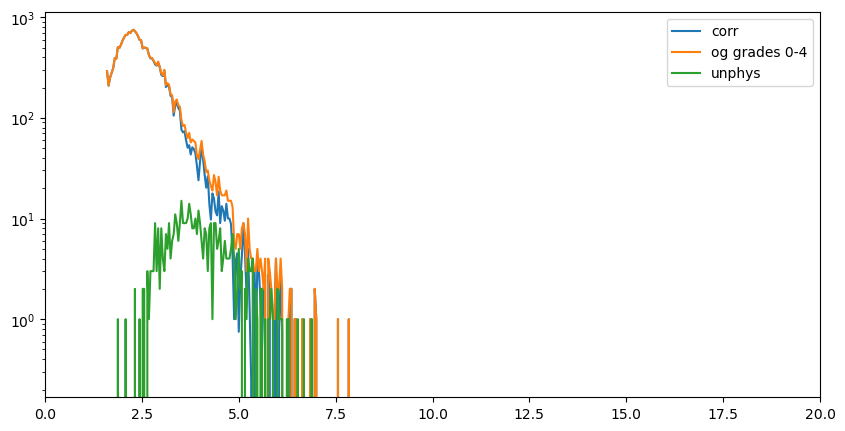

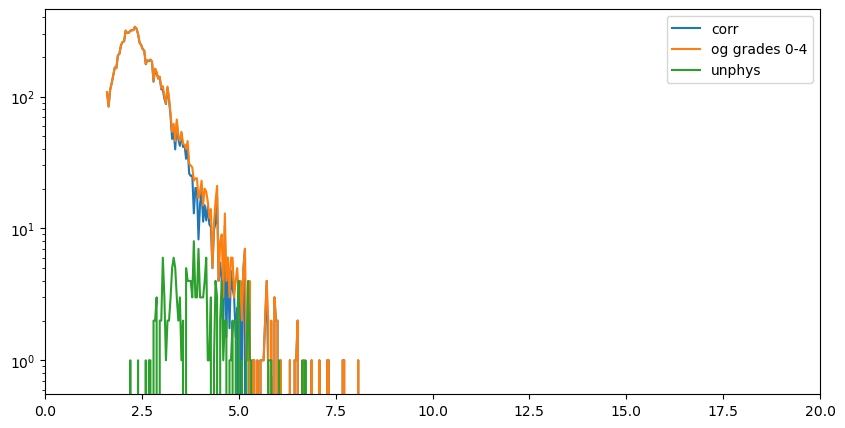

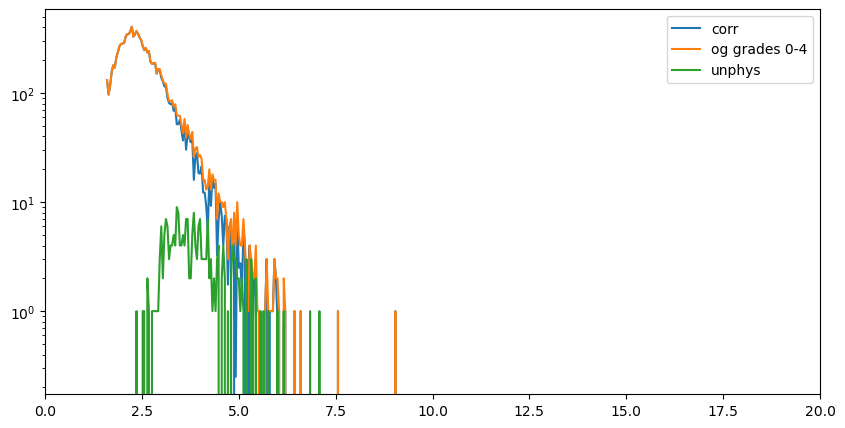

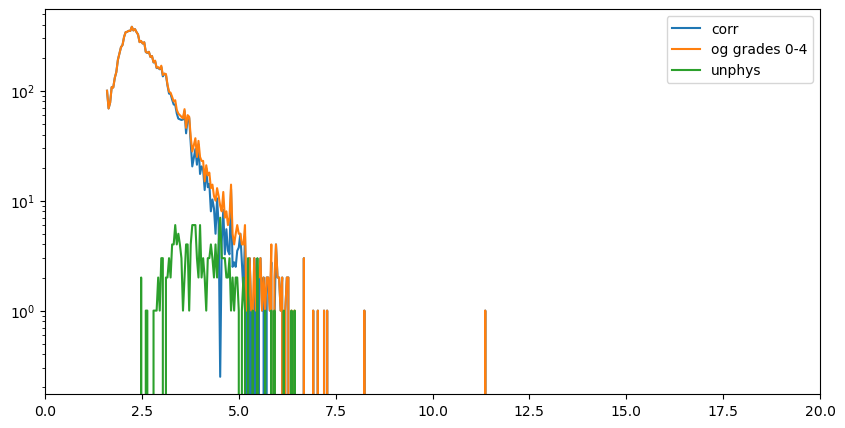

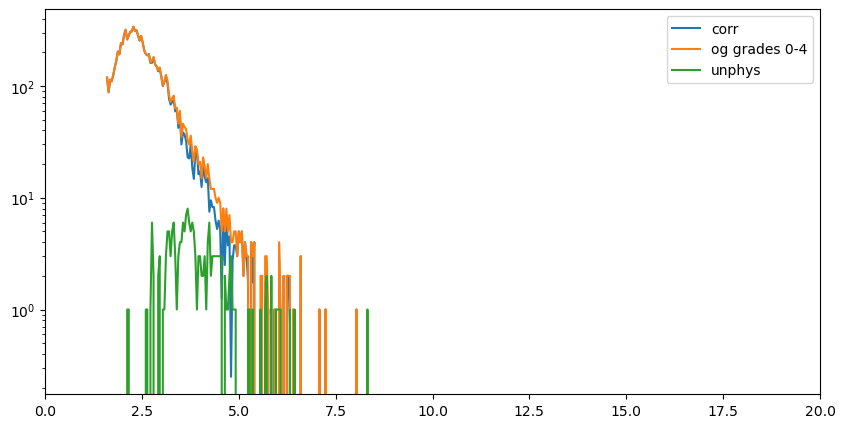

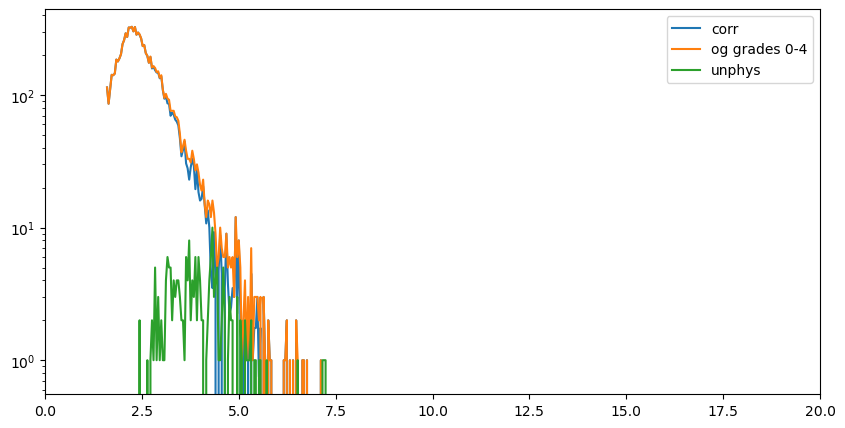

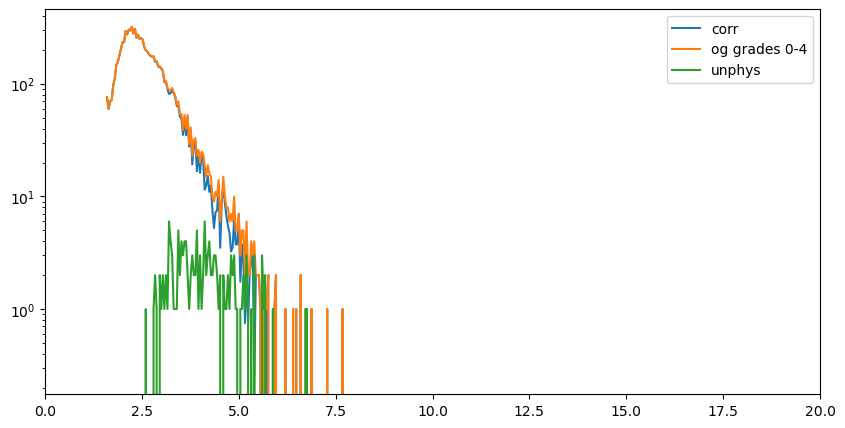

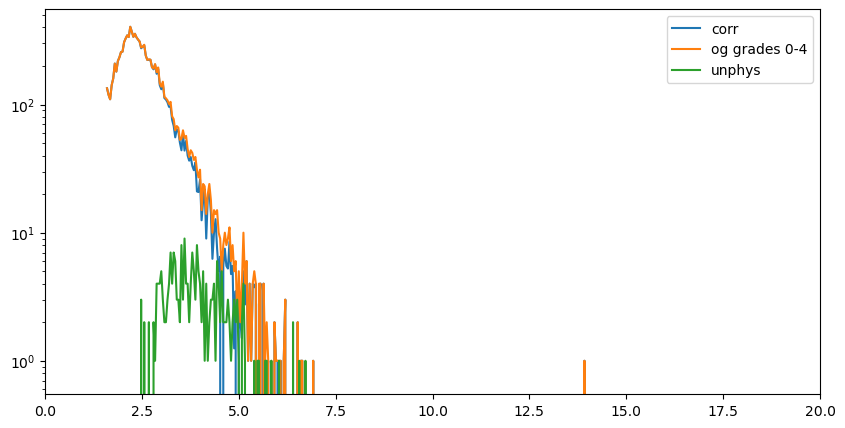

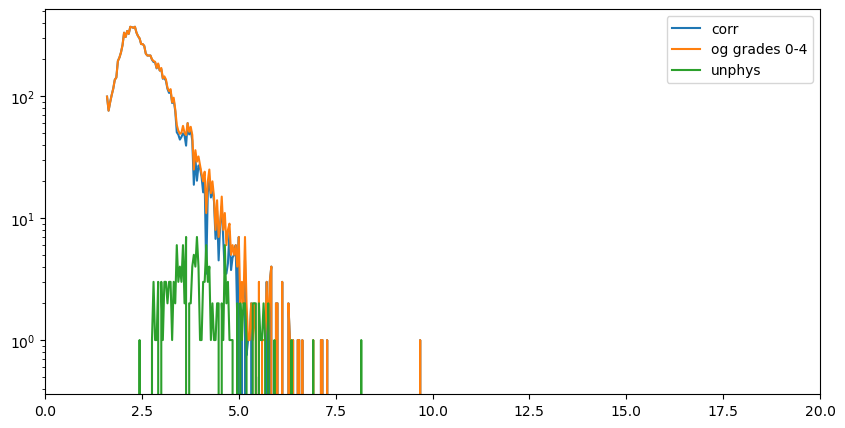

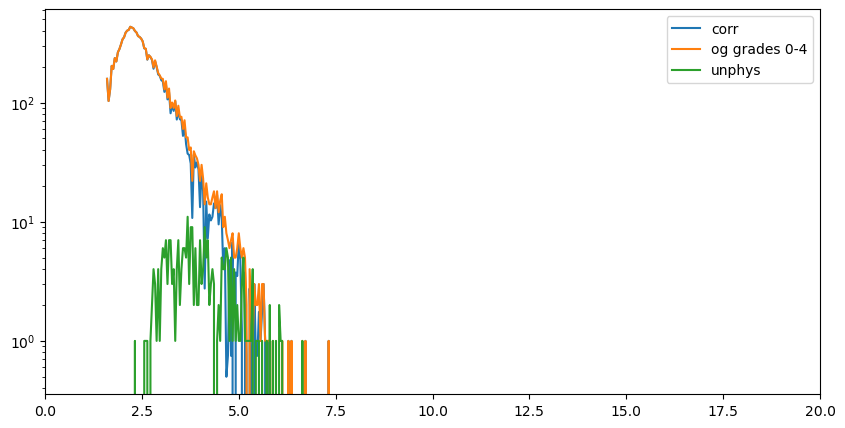

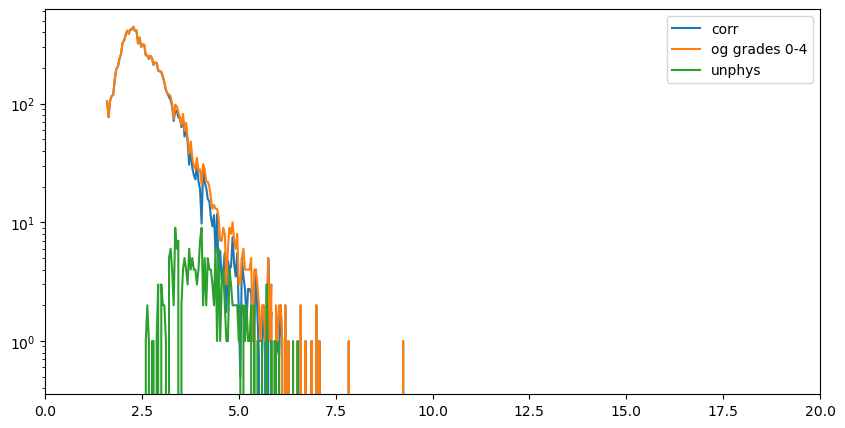

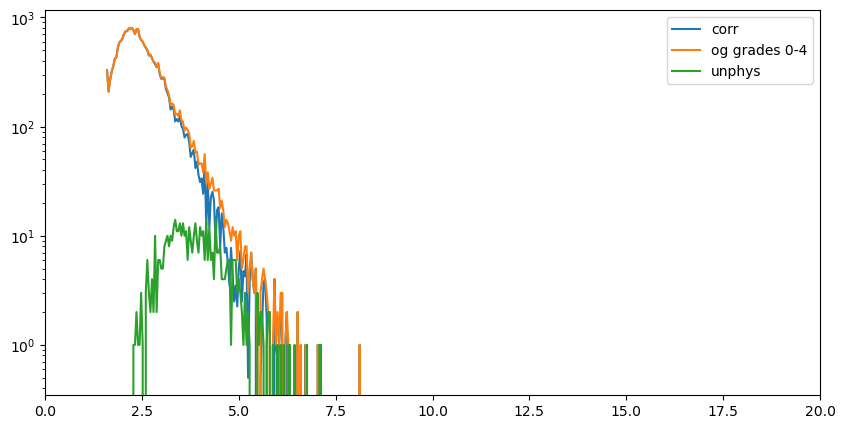

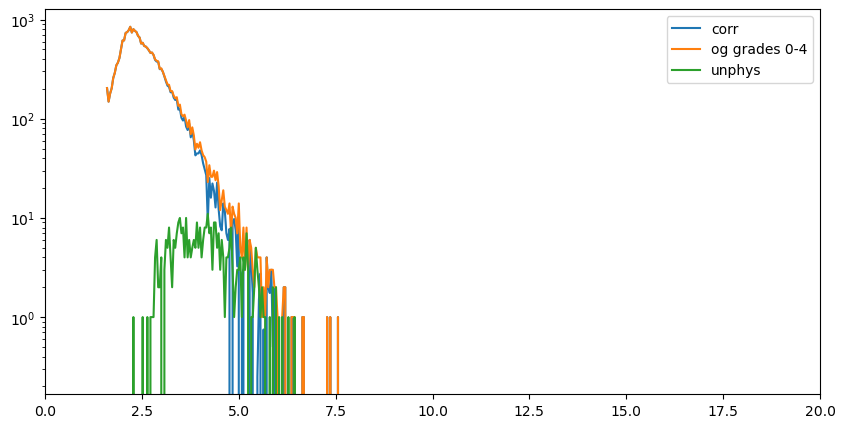

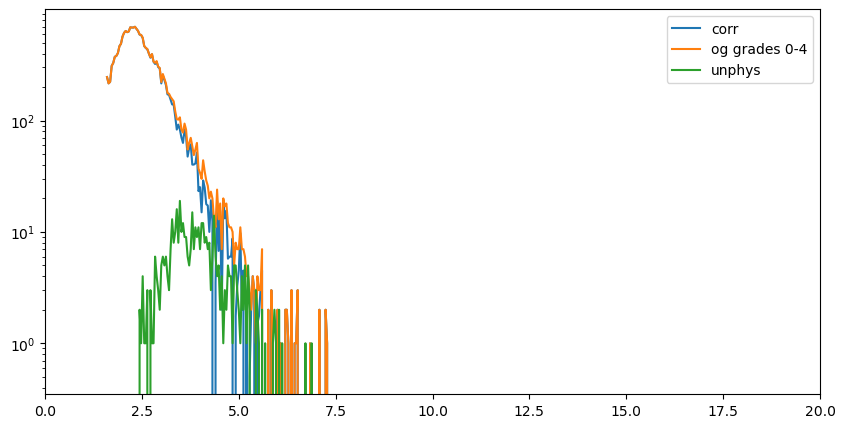

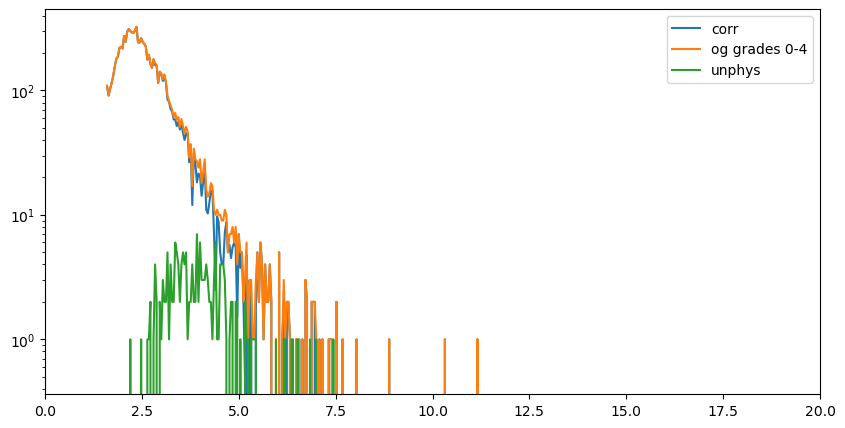

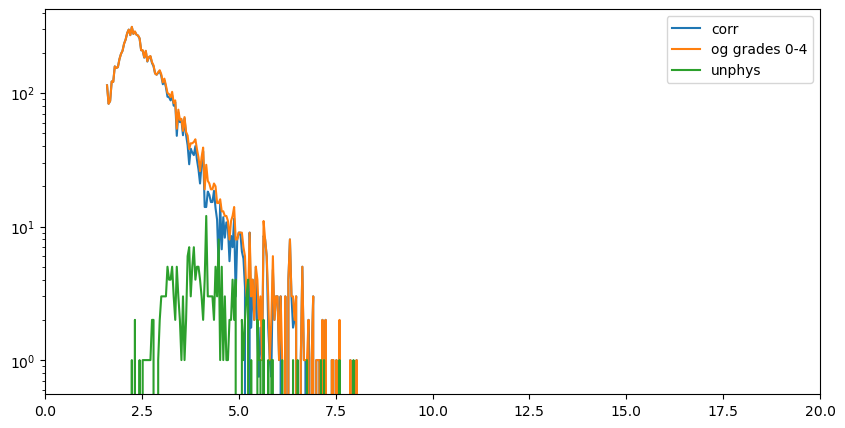

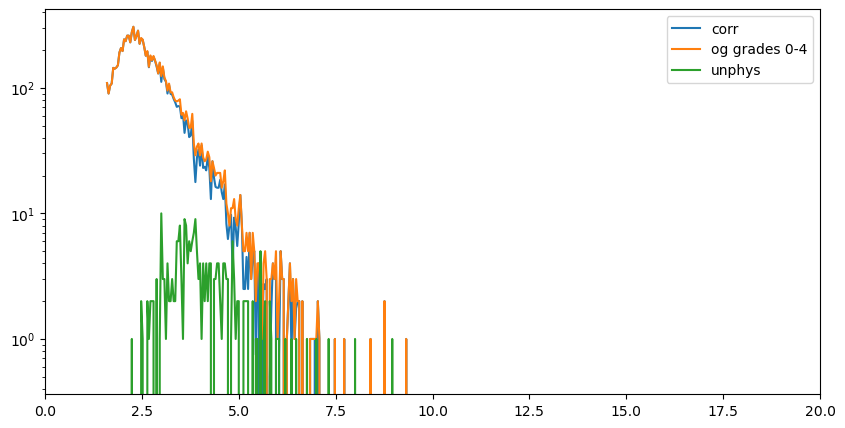

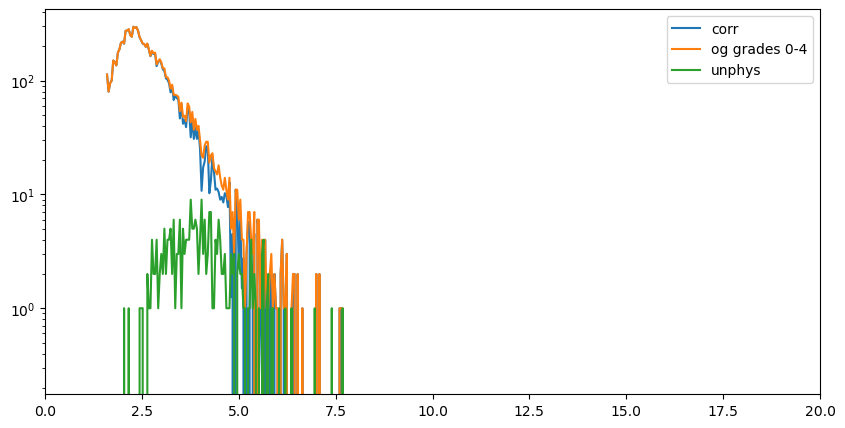

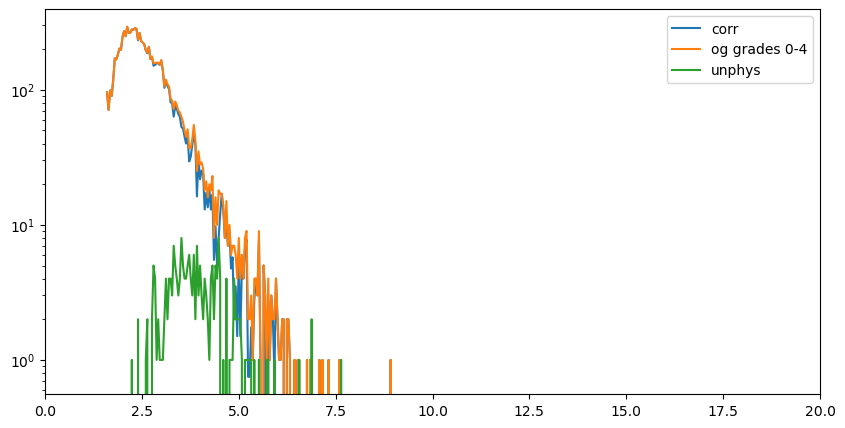

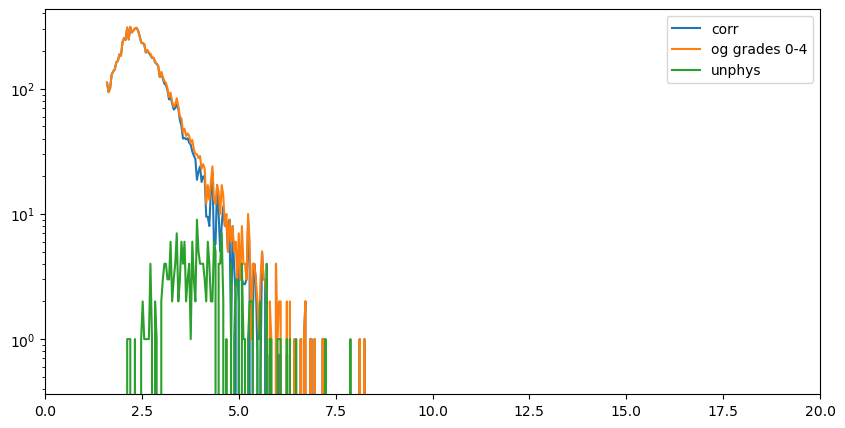

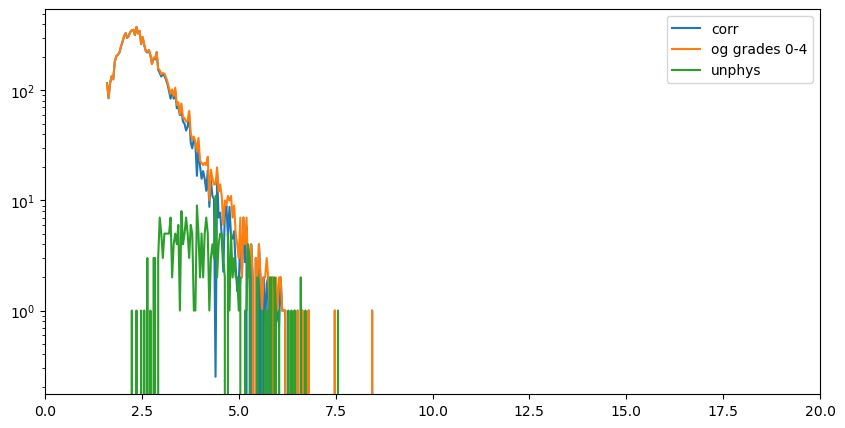

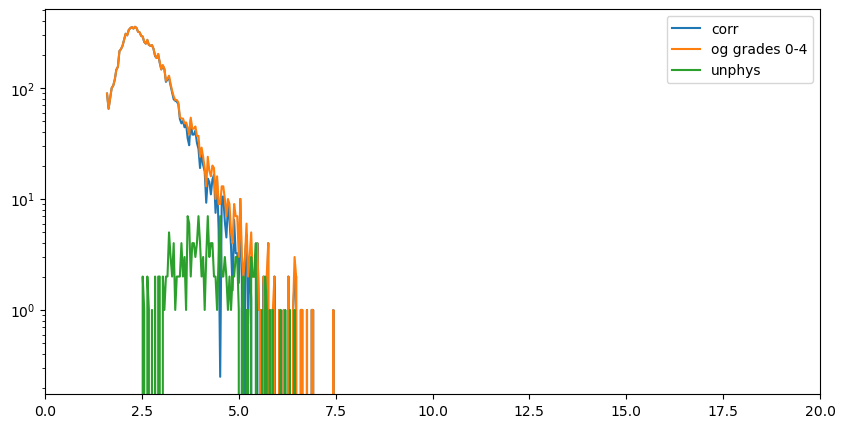

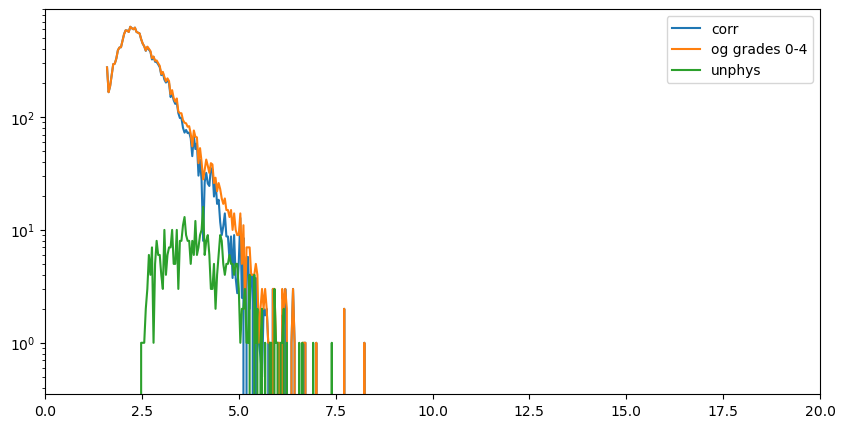

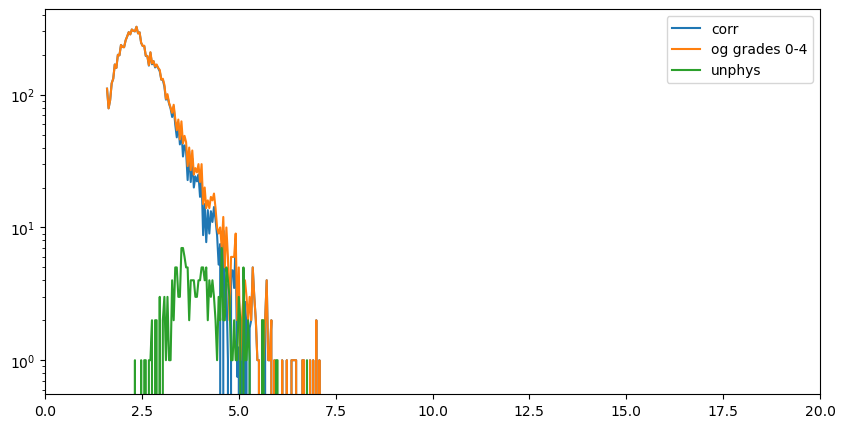

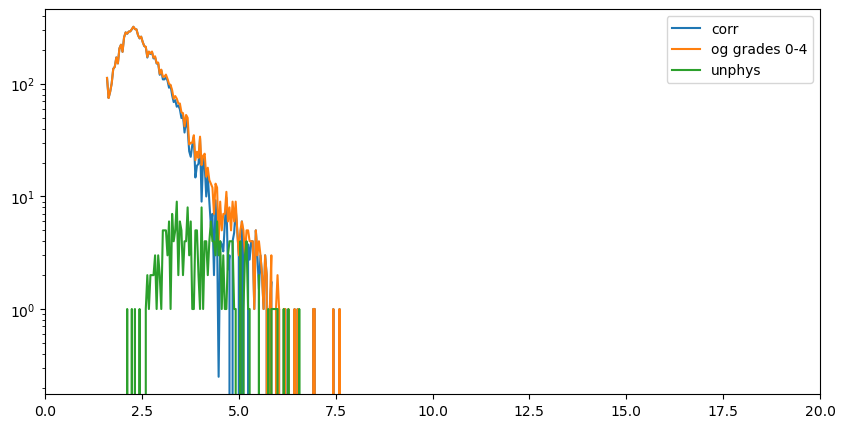

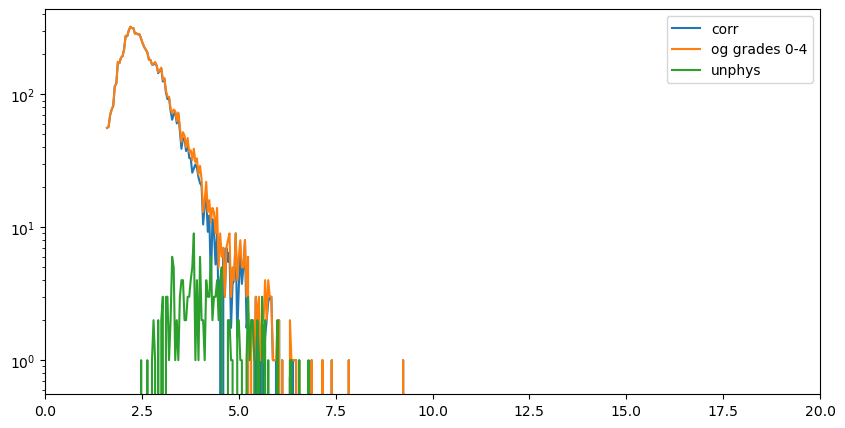

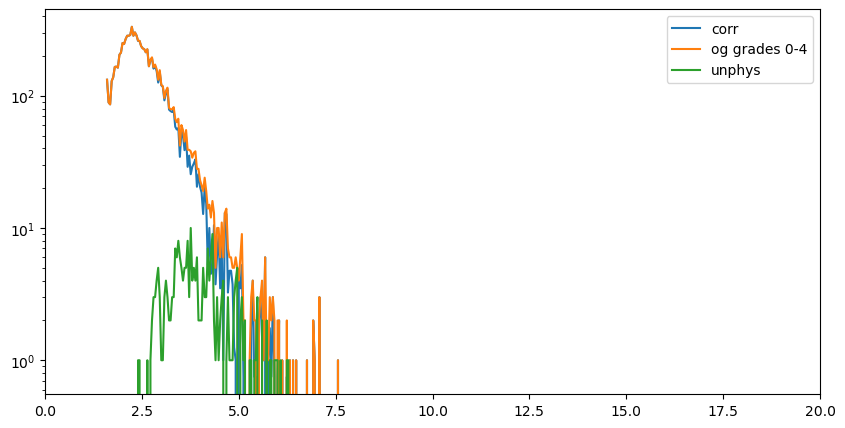

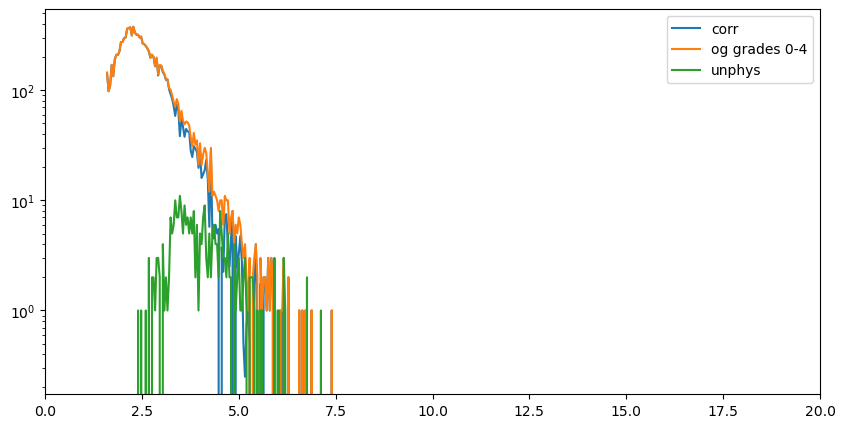

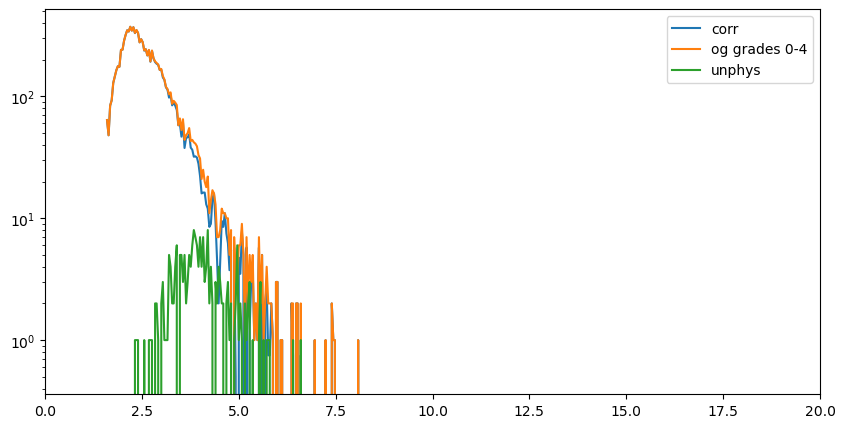

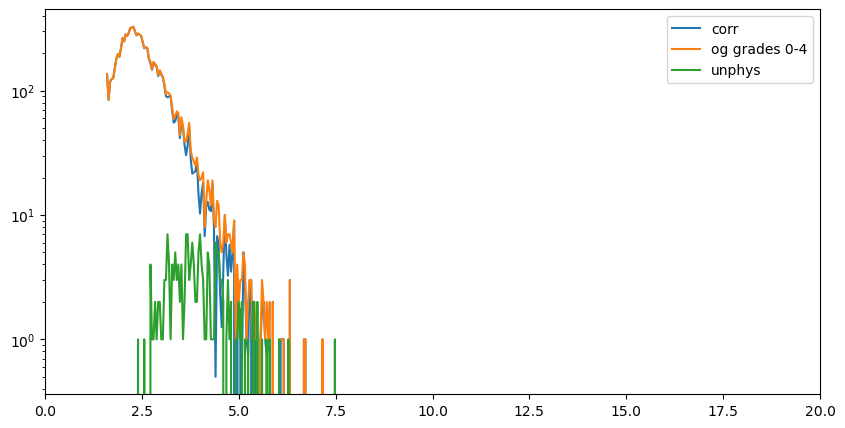

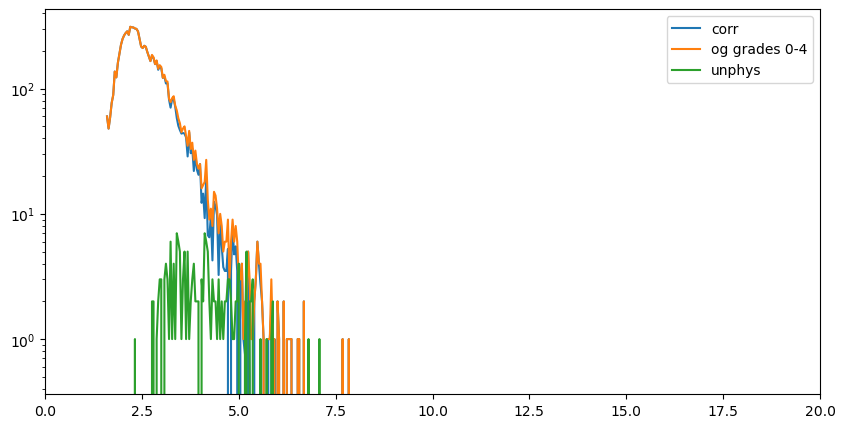

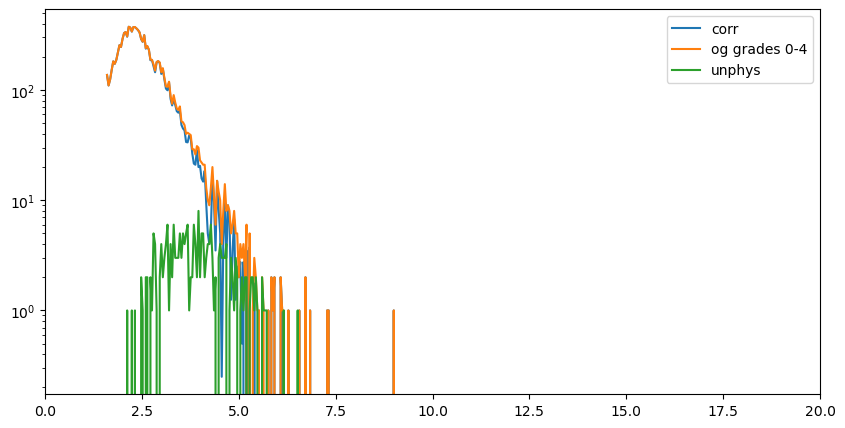

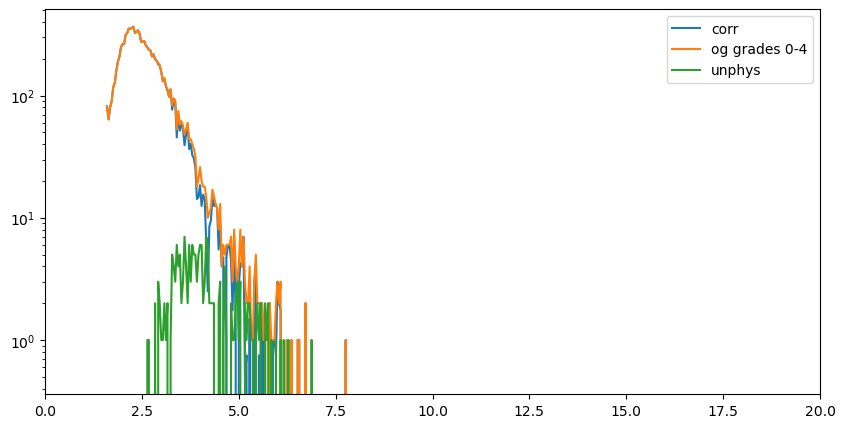

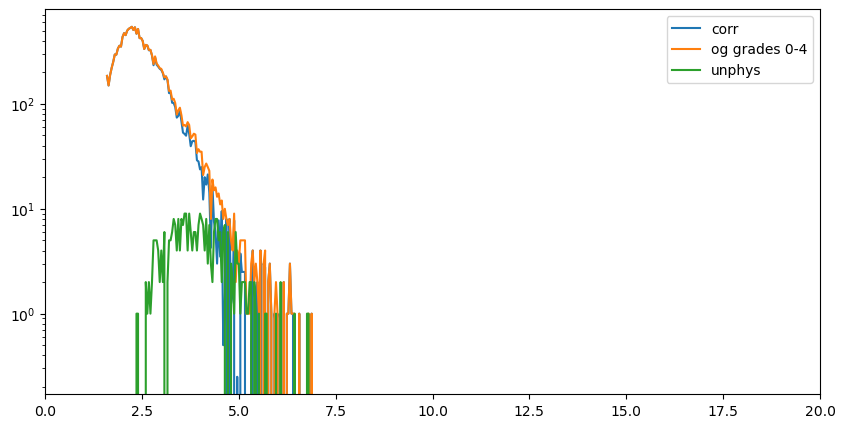

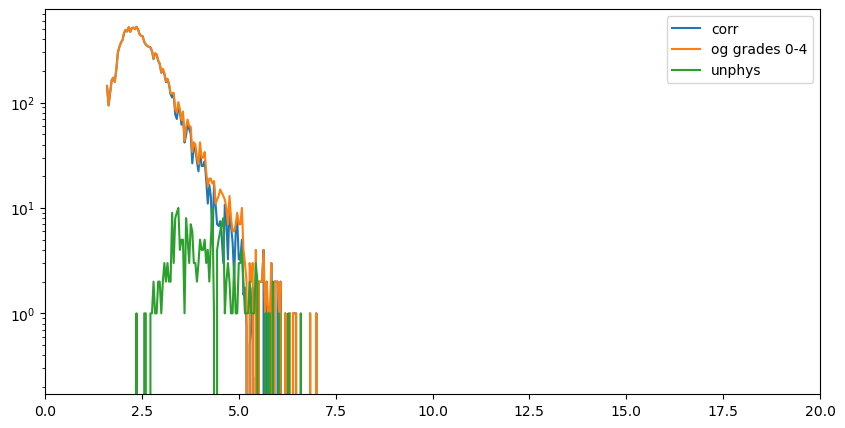

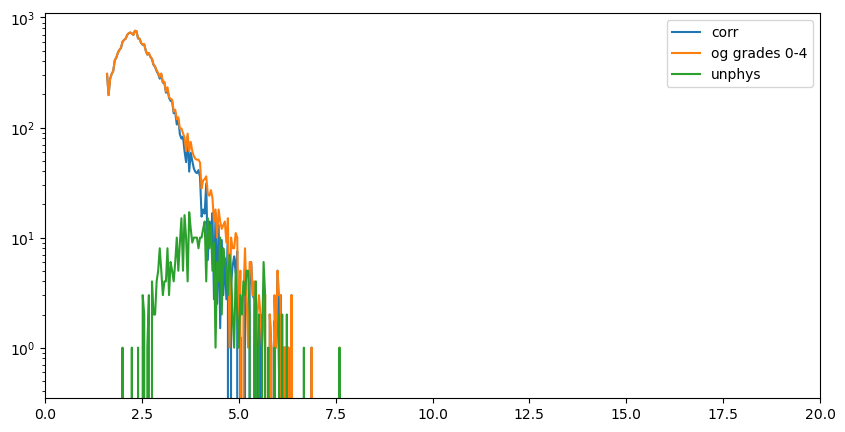

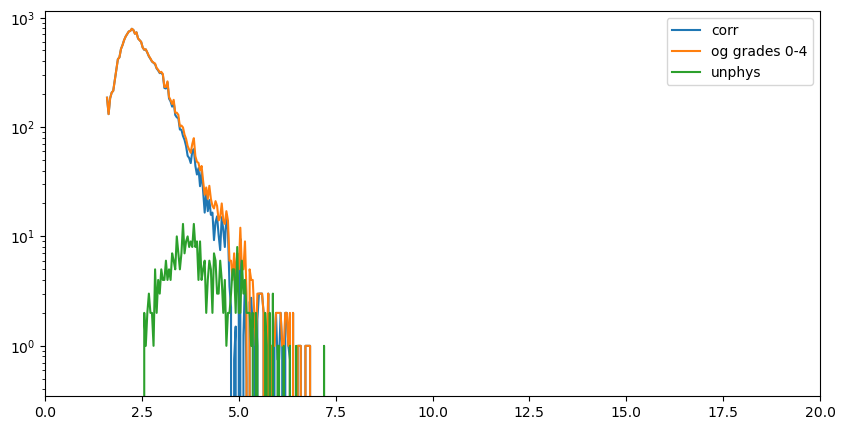

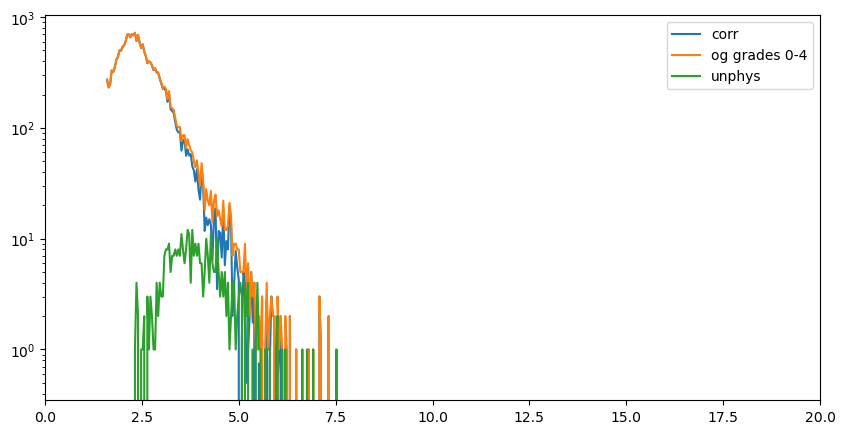

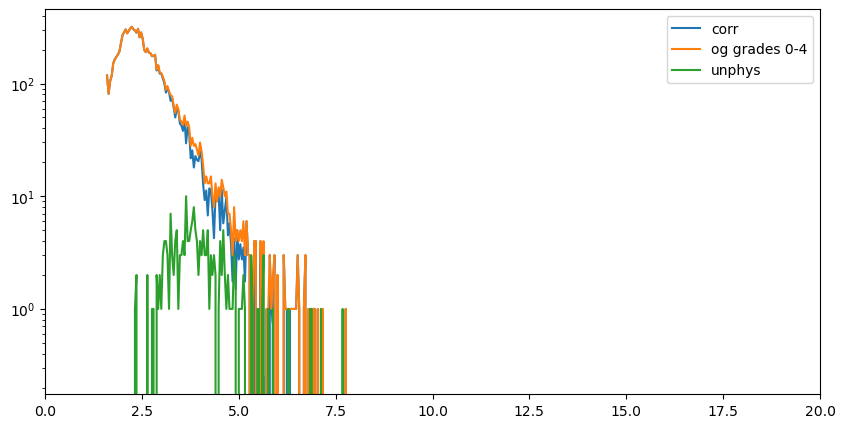

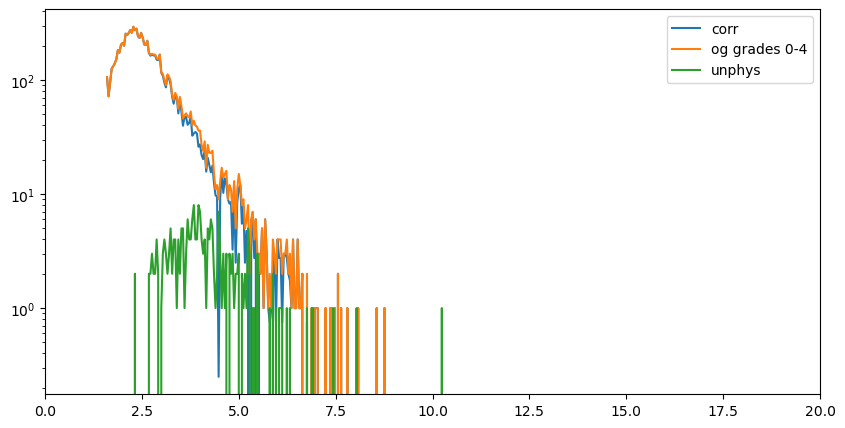

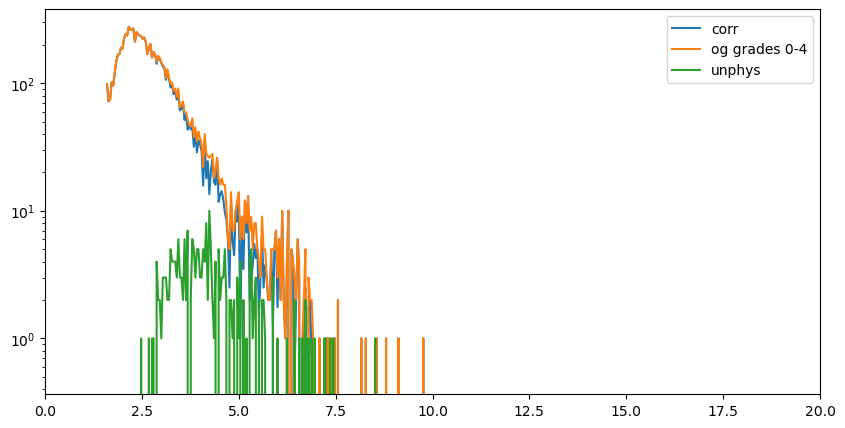

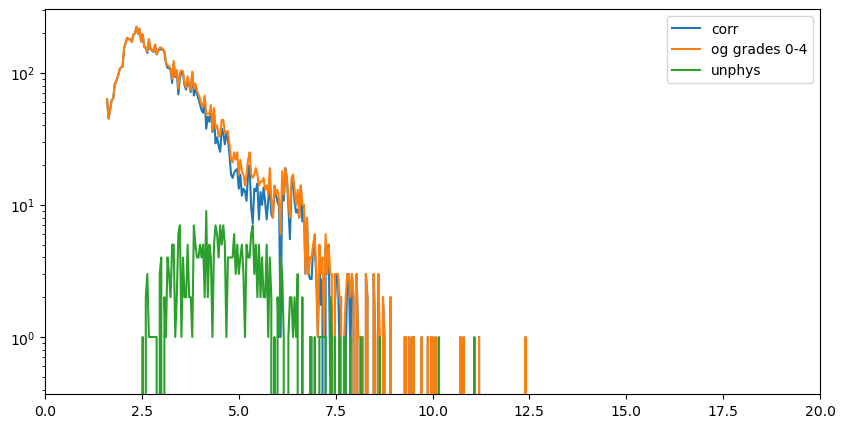

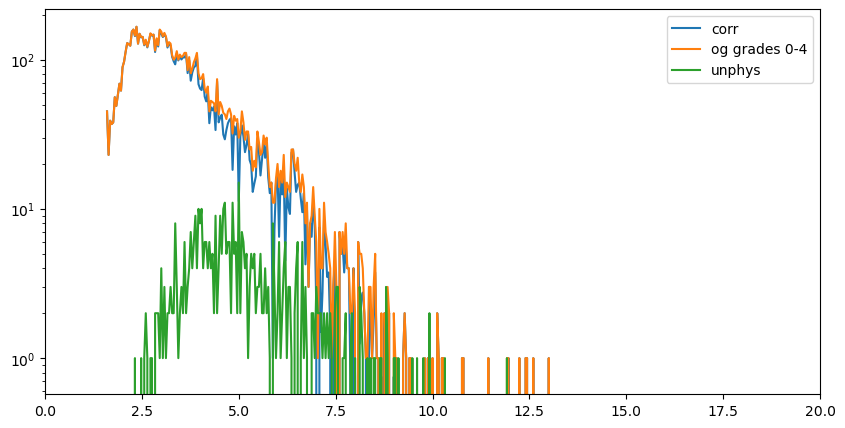

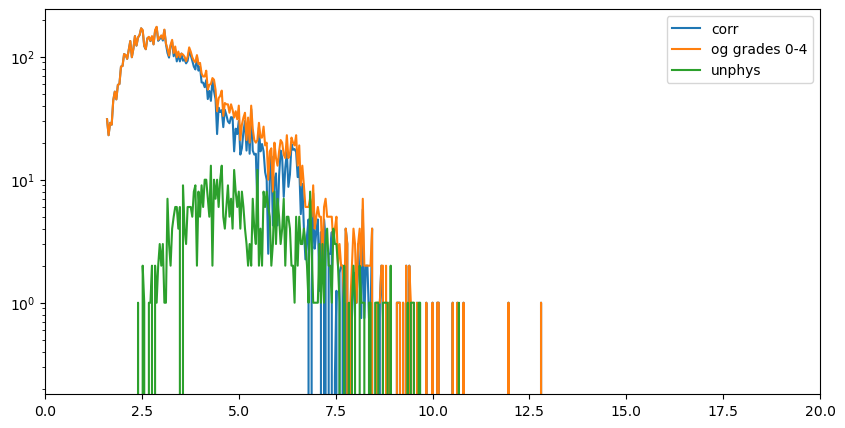

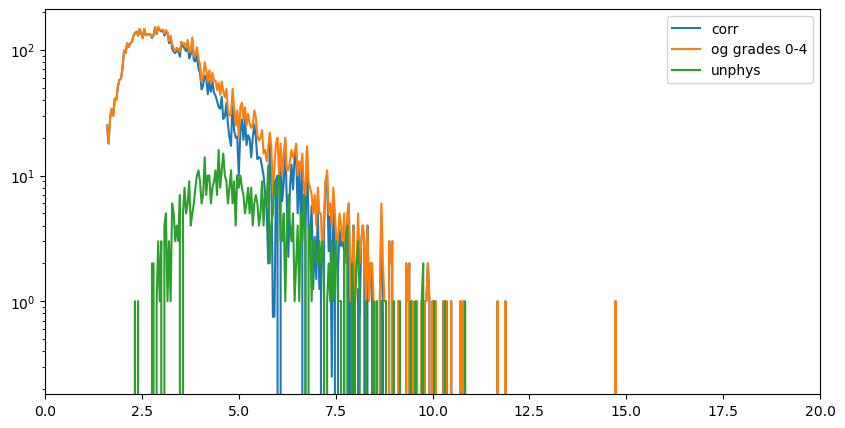

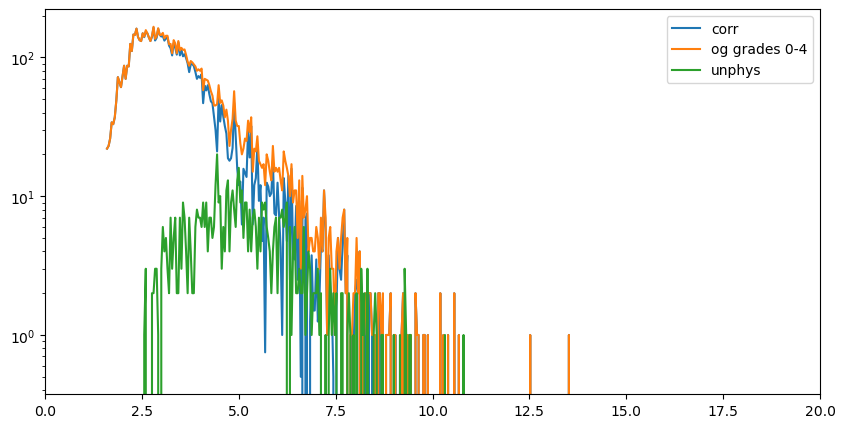

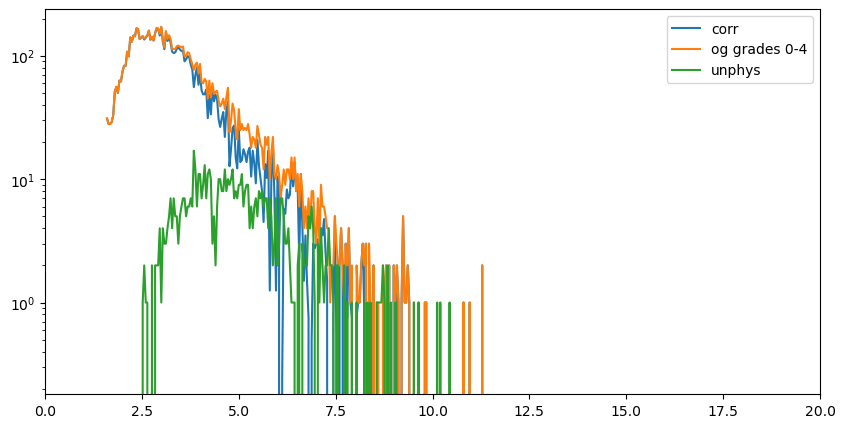

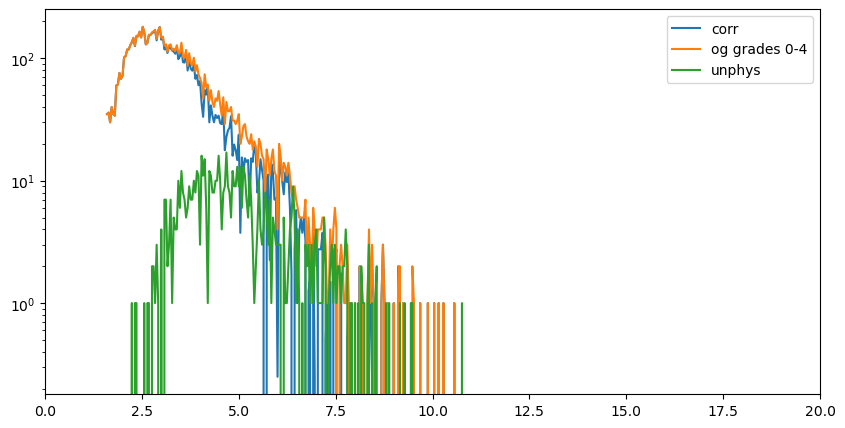

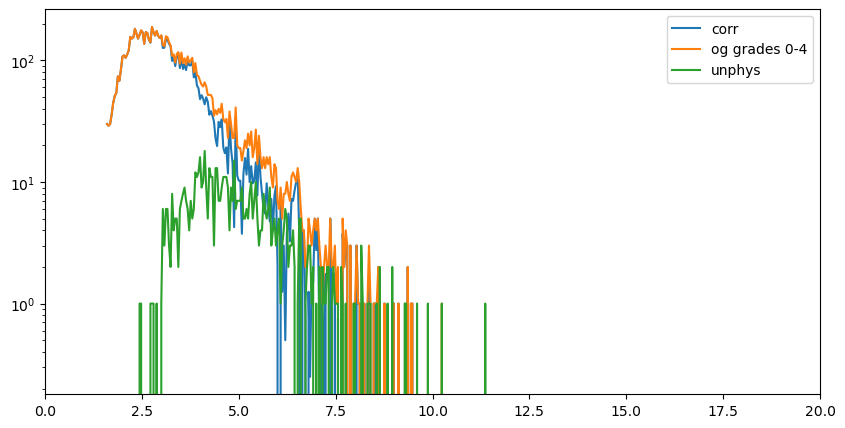

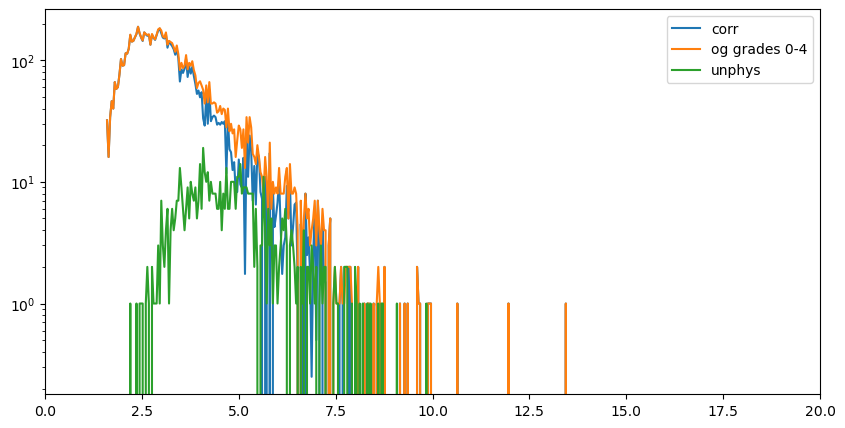

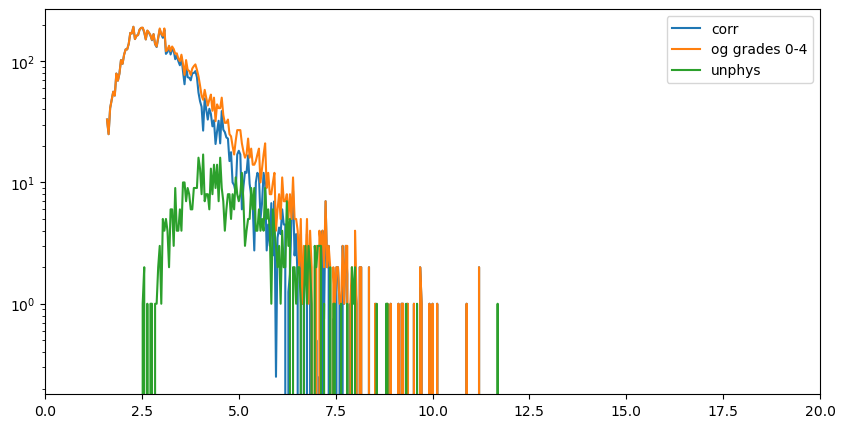

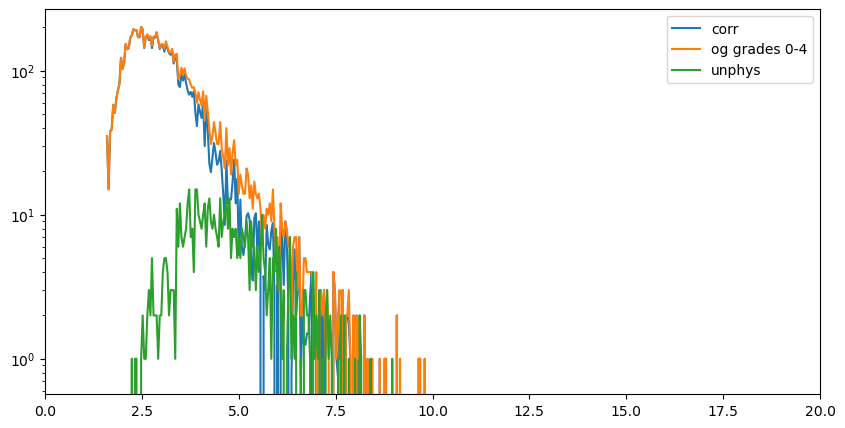

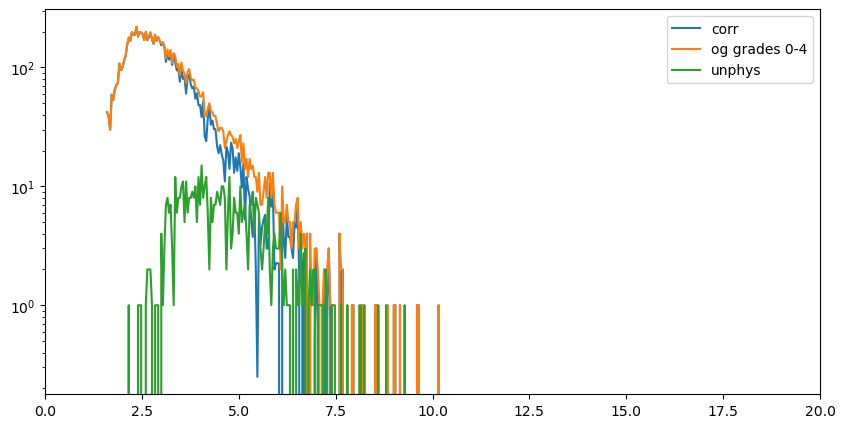

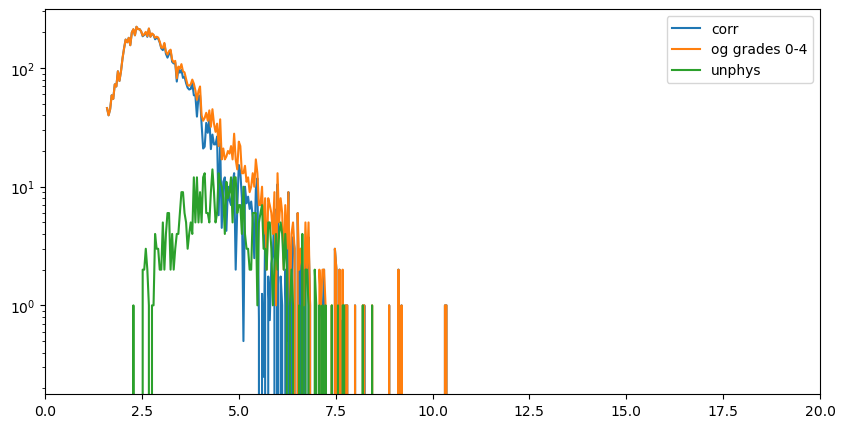

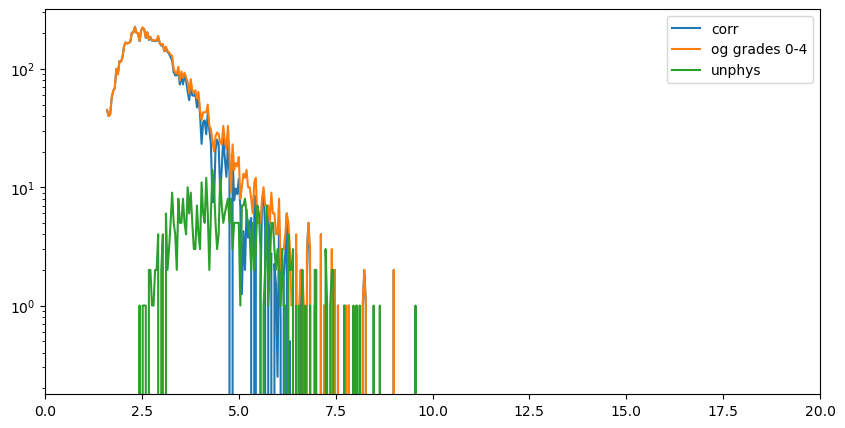

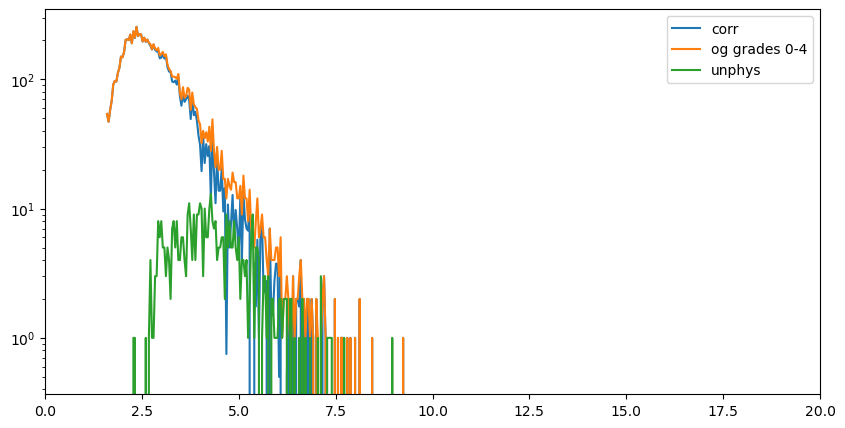

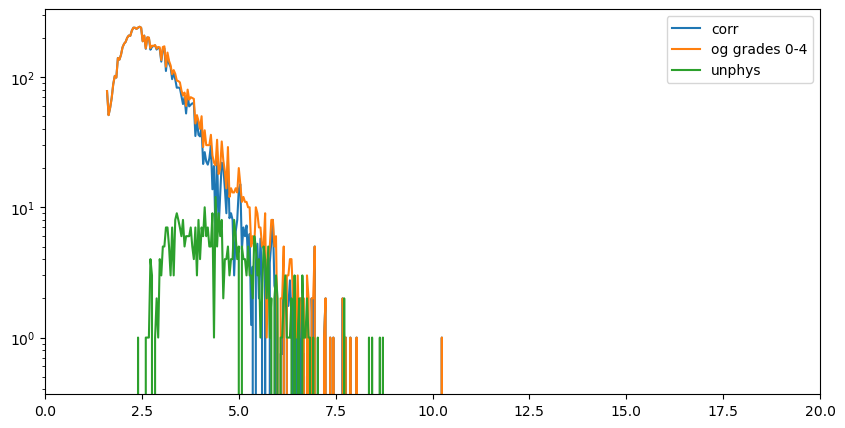

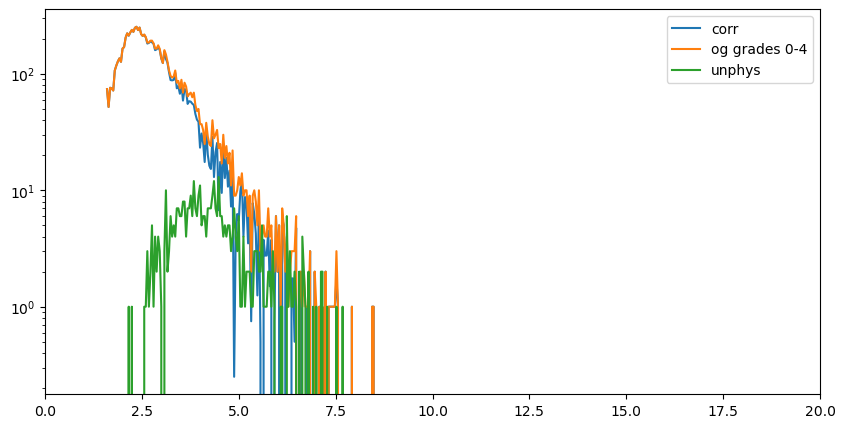

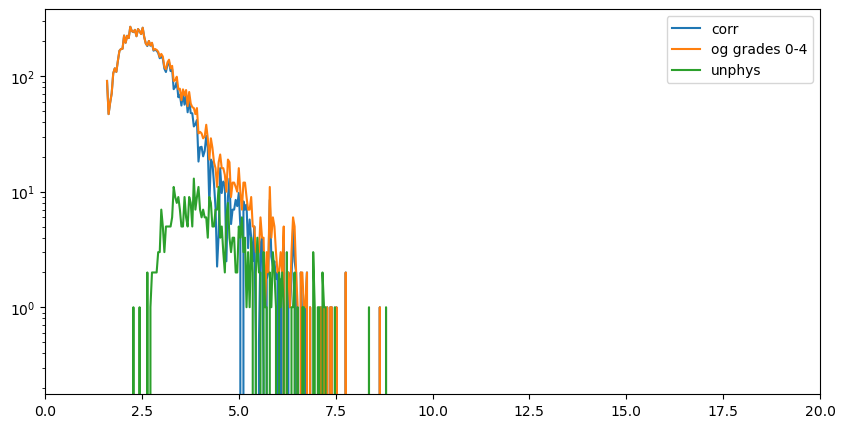

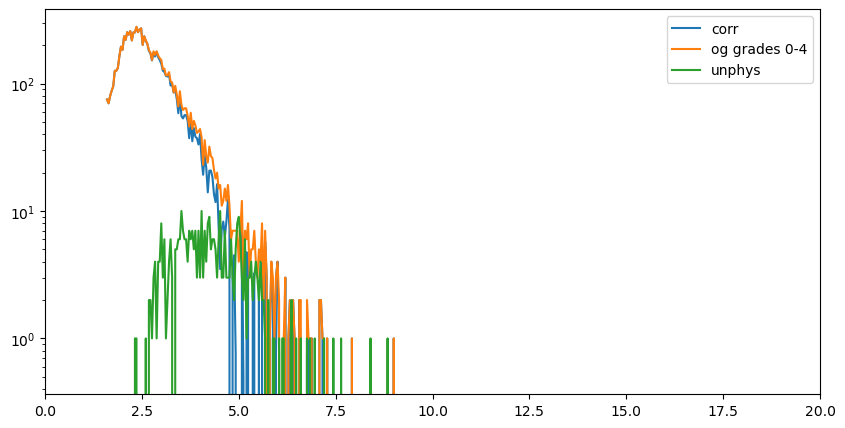

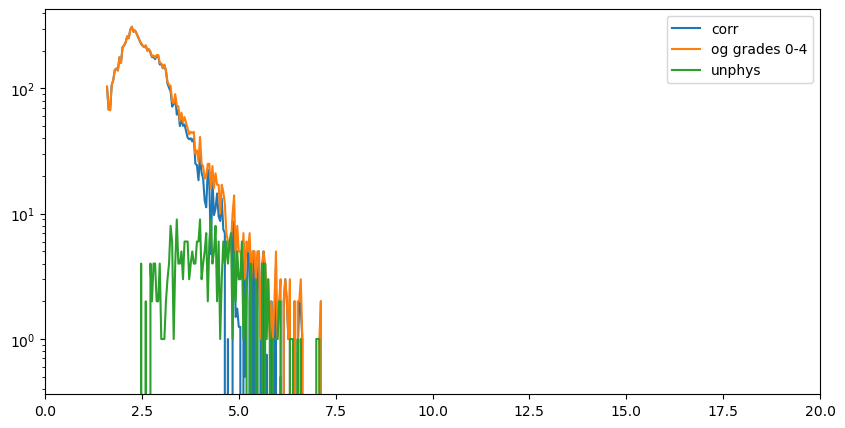

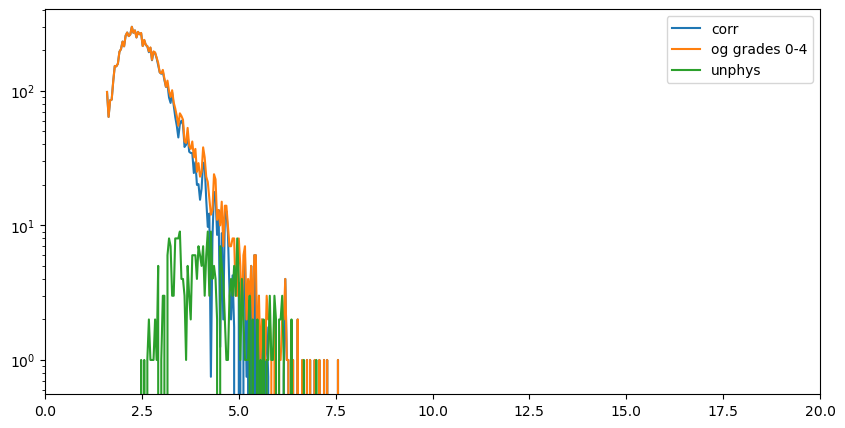

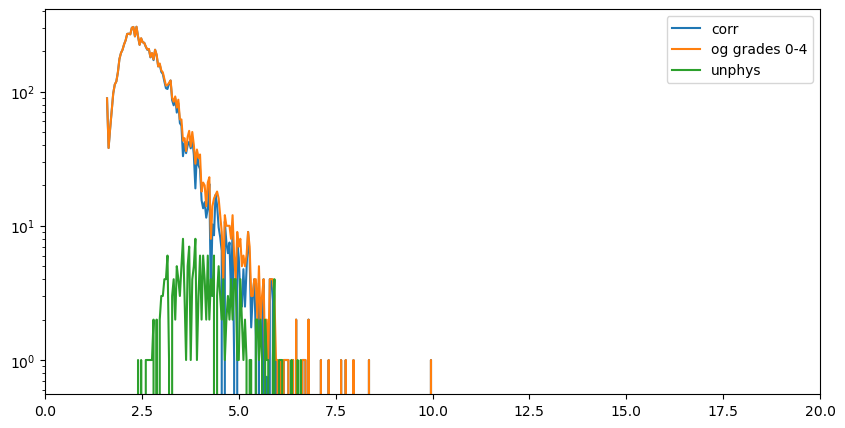

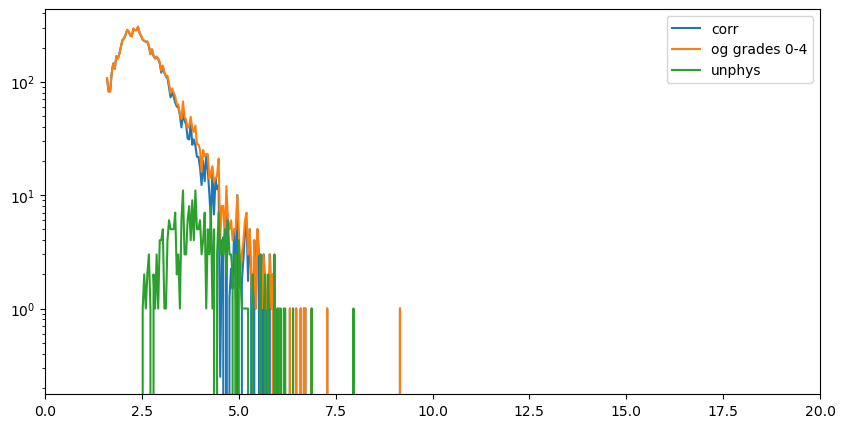

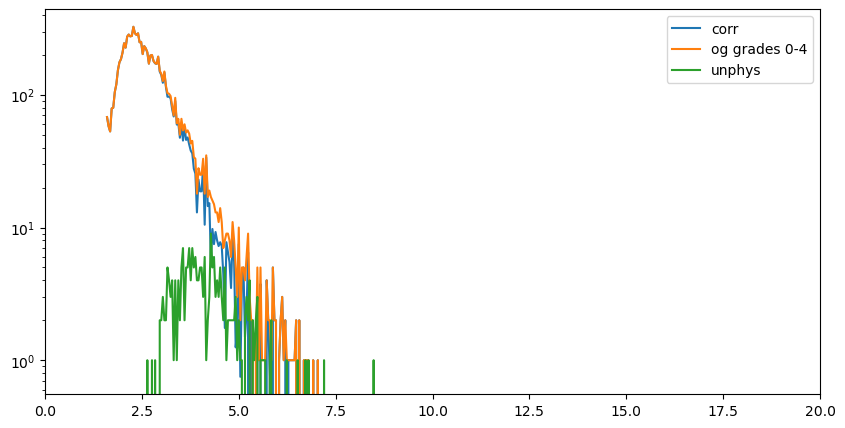

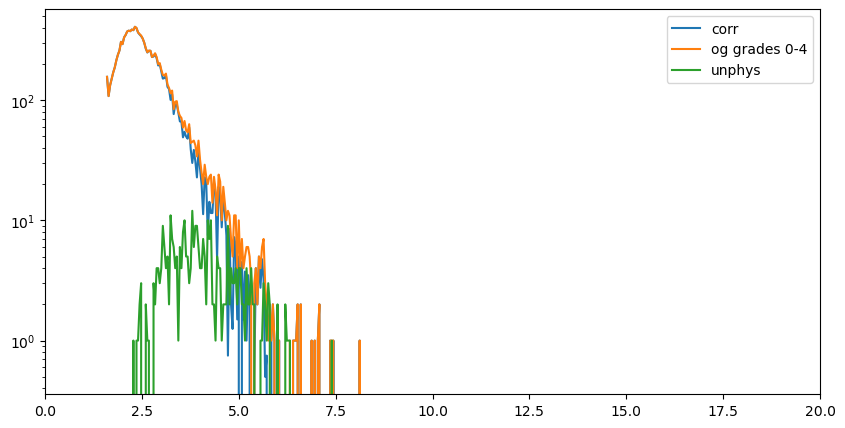

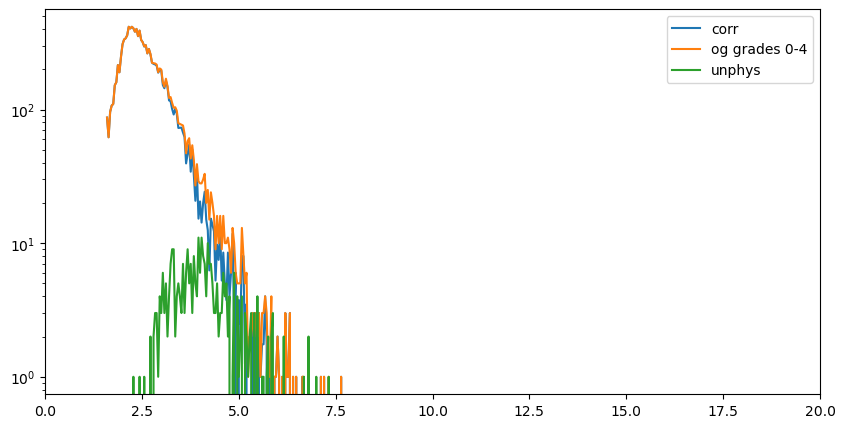

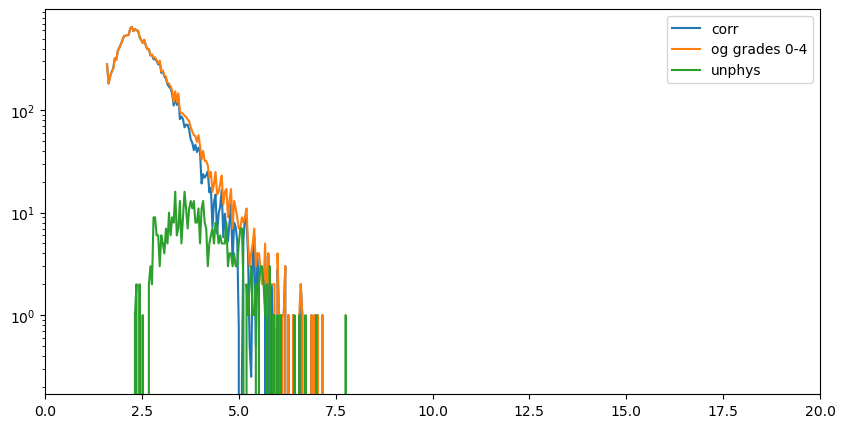

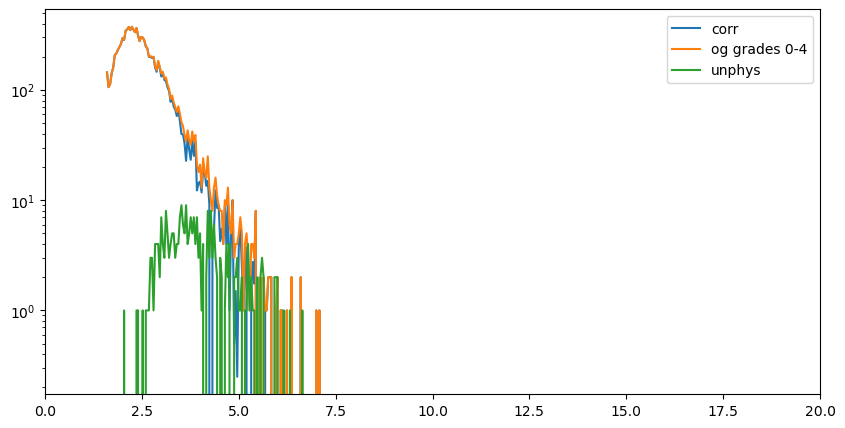

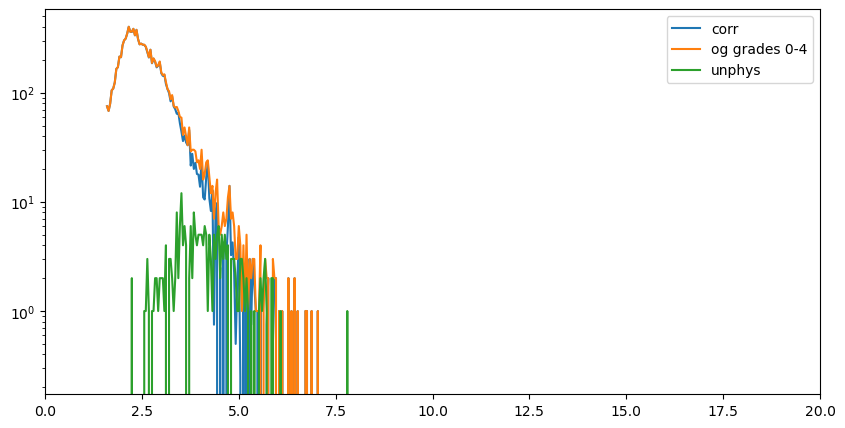

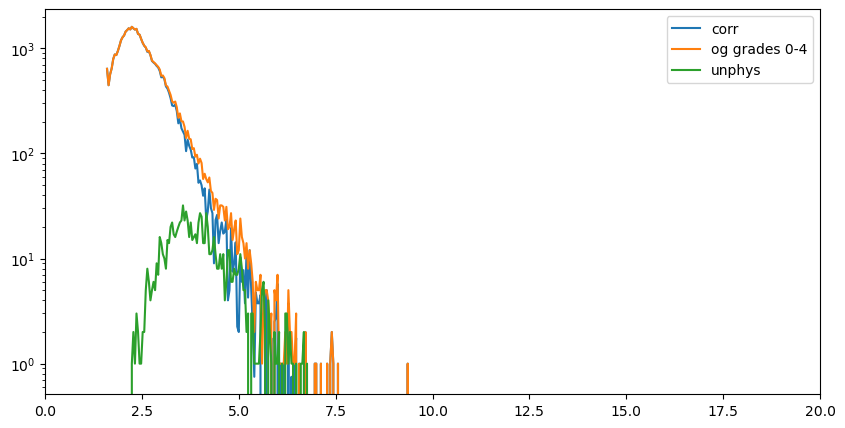

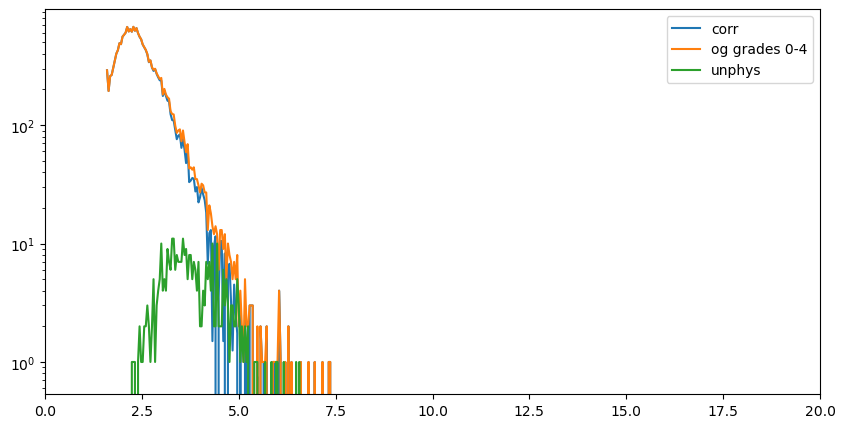

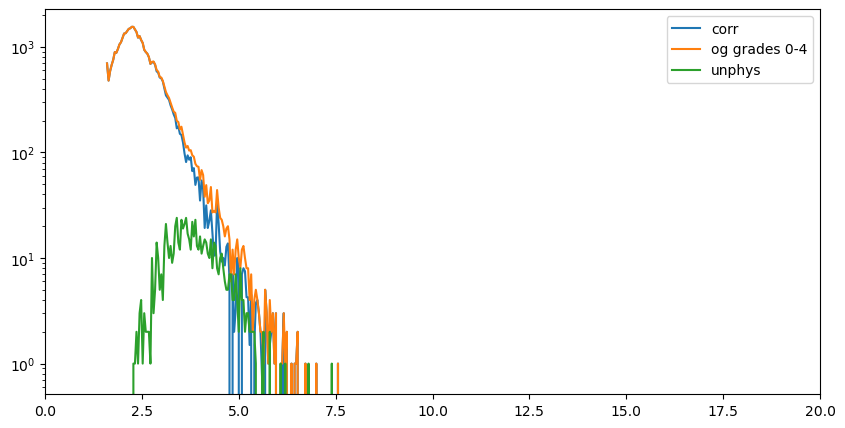

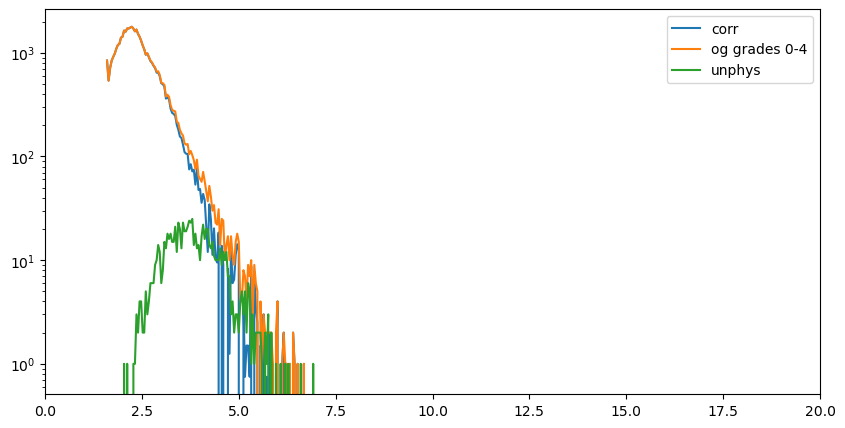

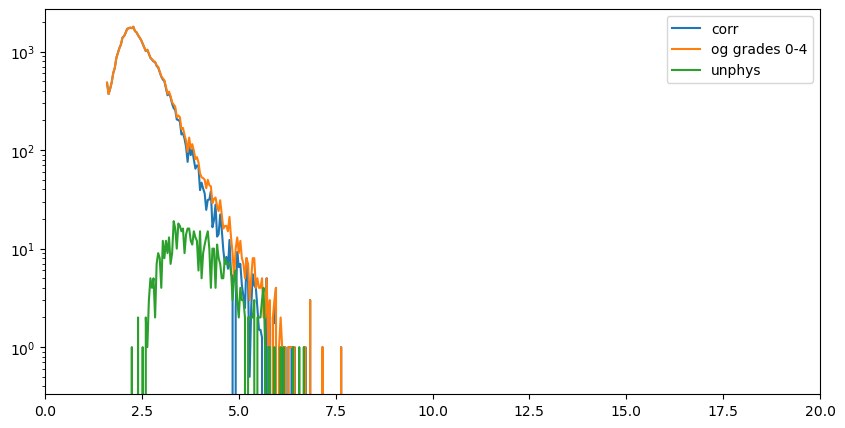

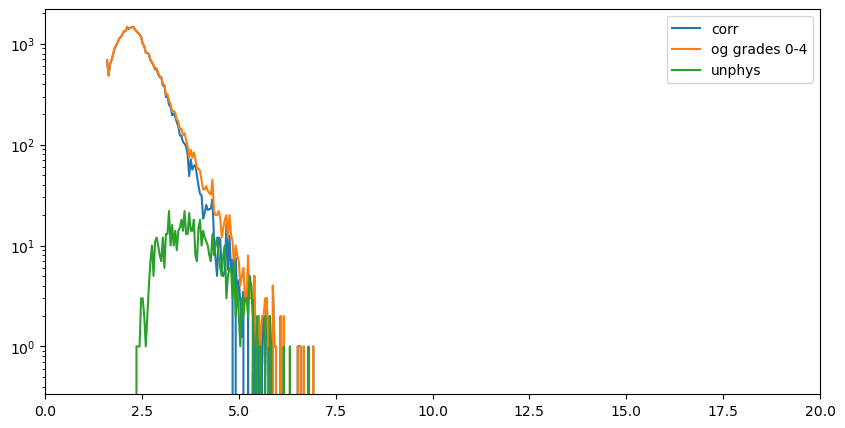

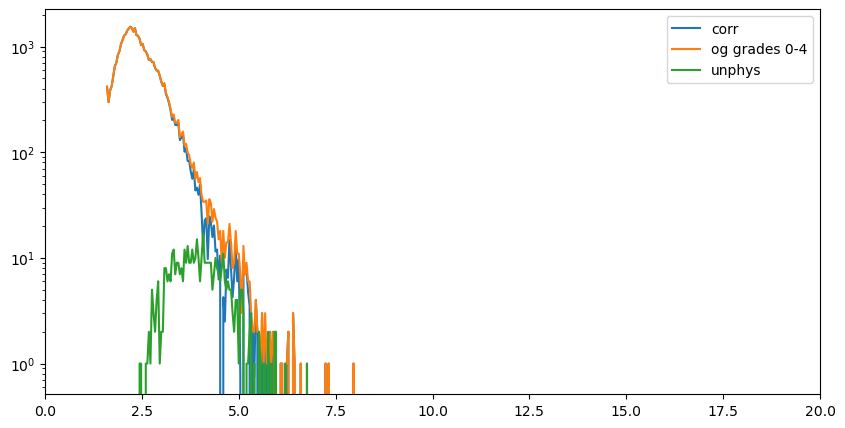

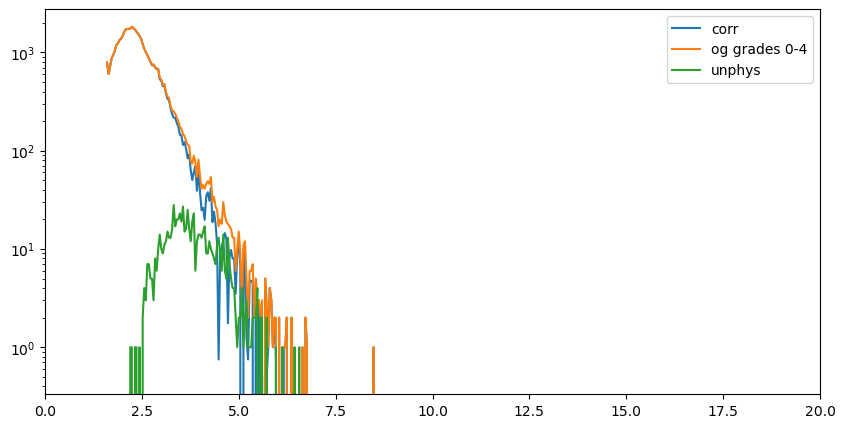

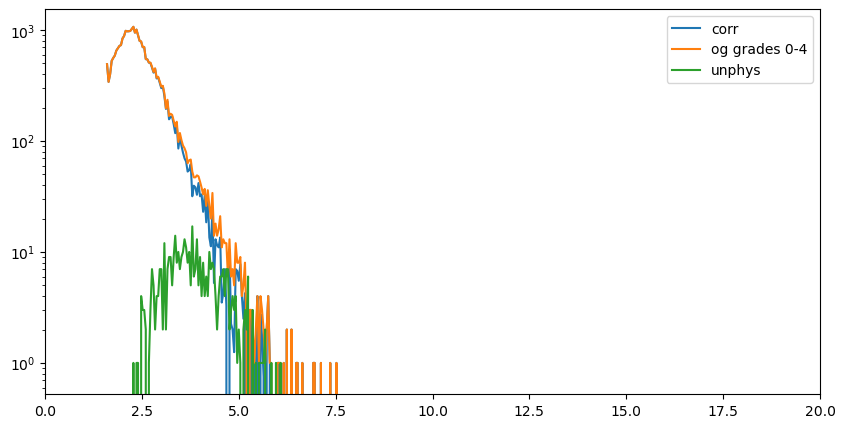

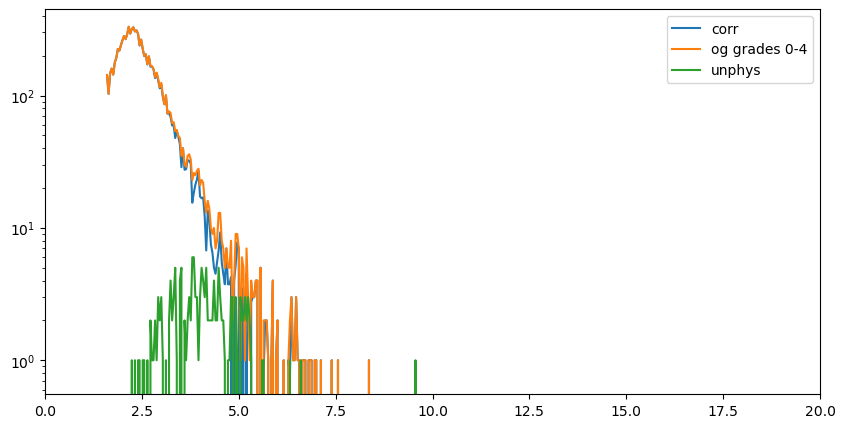

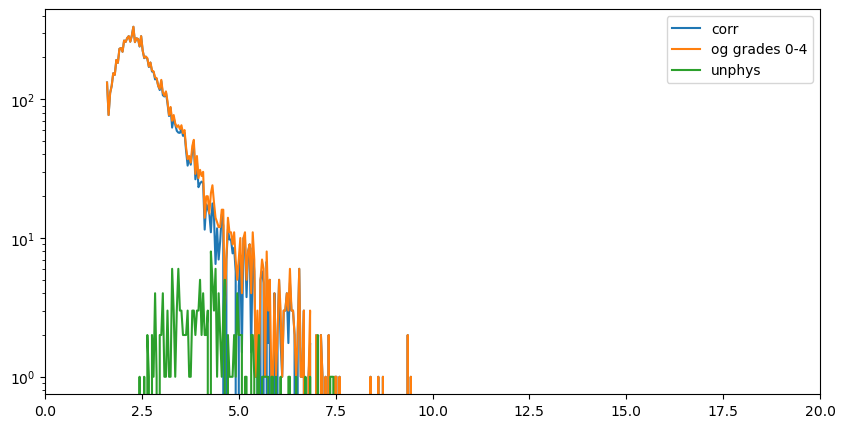

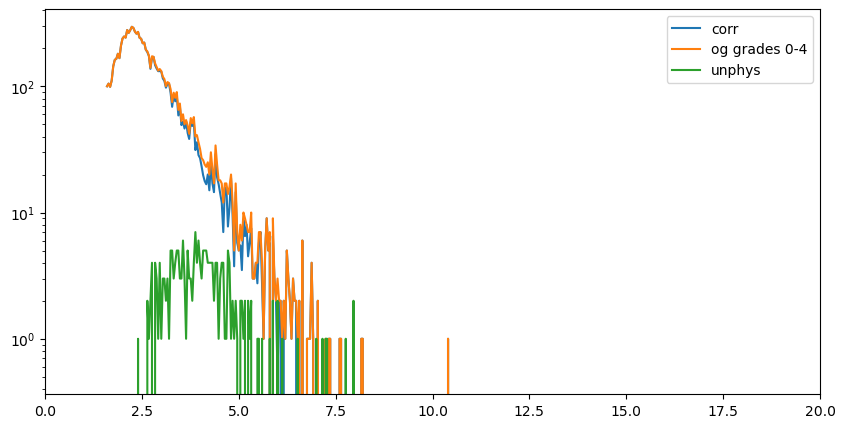

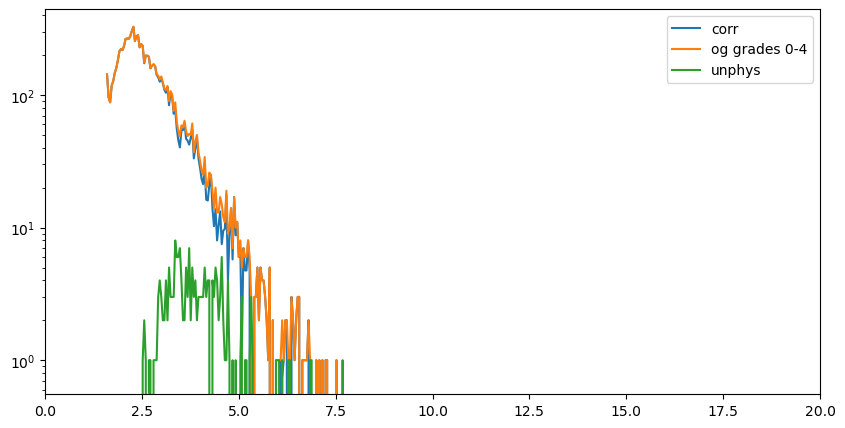

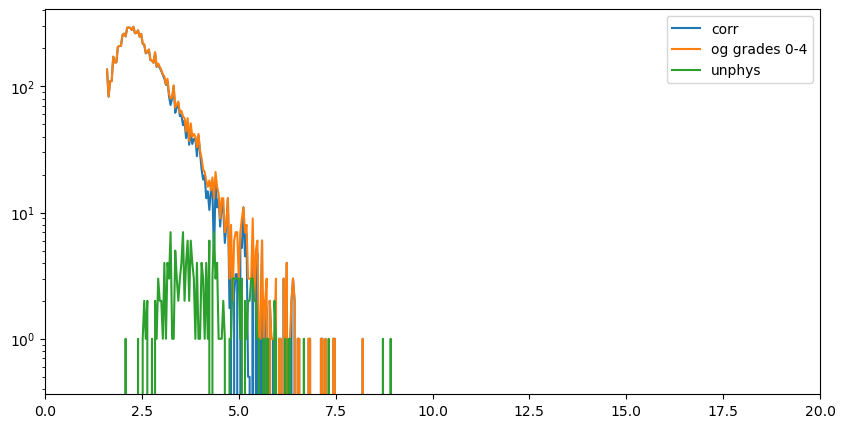

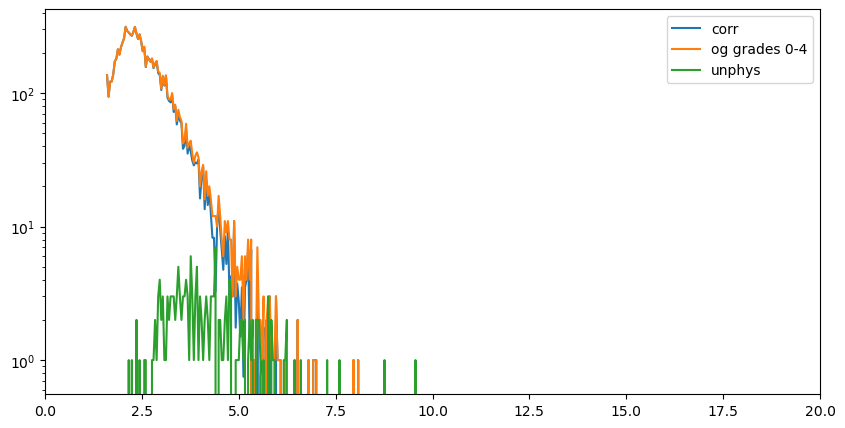

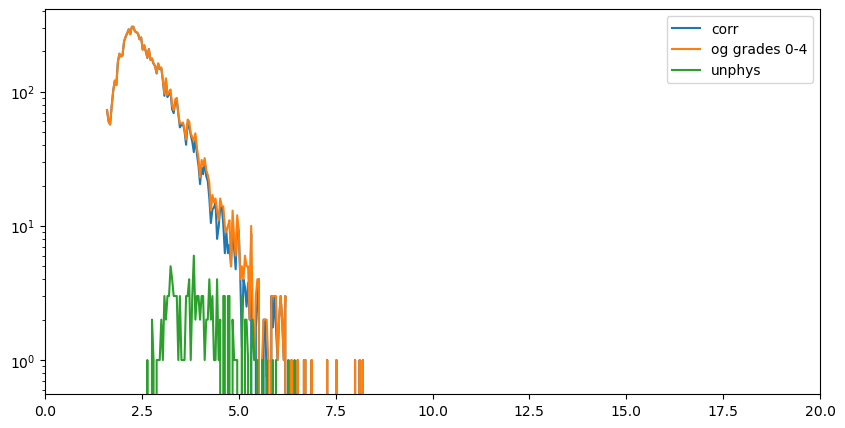

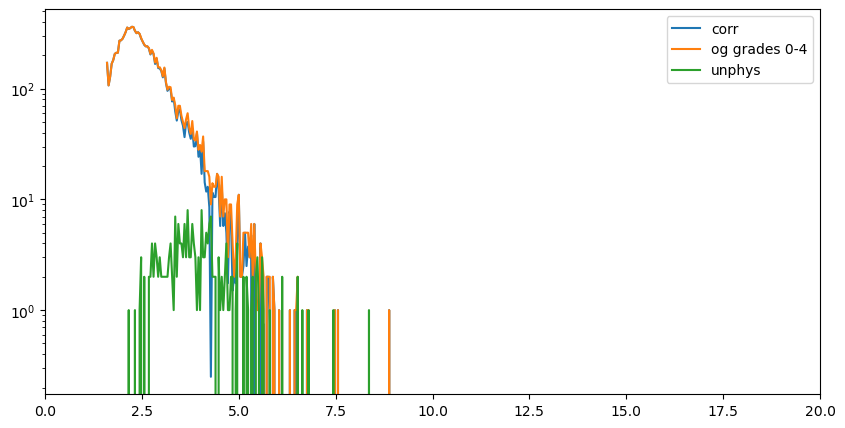

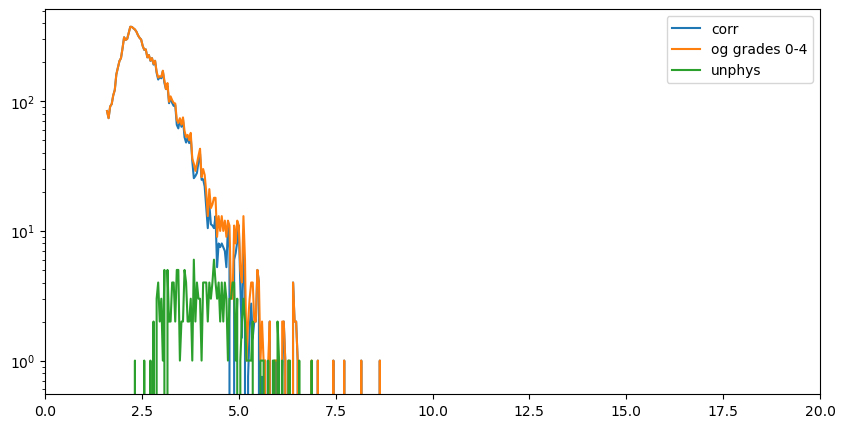

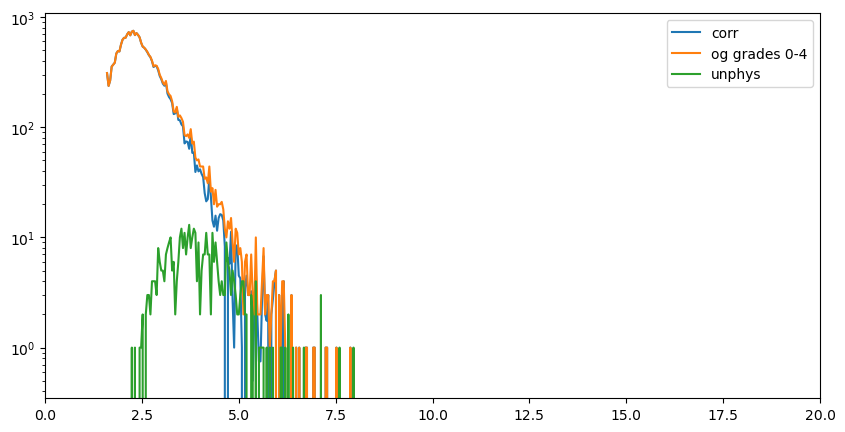

In [5]:
#Now, find DEM time intervals + make NuSTAR spectral data products.
res = tis.find_time_intervals_plus(datapath, timerange, working_dir, erange=[6.,10], 
                               lctype='corr54', fast_min_factor=1.5, countmin=10,
                              minimum_seconds=30)

In [6]:
#Print resulting intervals
count=0    
for t in res[0]:
    print(count, t[0].strftime('%H-%M-%S'), t[1].strftime('%H-%M-%S'))
    count+=1

0 15-59-30 16-00-40
1 16-00-40 16-01-10
2 16-01-10 16-01-45
3 16-01-45 16-02-15
4 16-02-15 16-02-45
5 16-02-45 16-03-20
6 16-03-20 16-04-00
7 16-04-00 16-05-15
8 16-05-15 16-06-20
9 16-06-20 16-06-50
10 16-06-50 16-07-20
11 16-07-20 16-07-50
12 16-07-50 16-08-20
13 16-08-20 16-08-50
14 16-08-50 16-09-20
15 16-09-20 16-09-55
16 16-09-55 16-10-55
17 16-10-55 16-11-25
18 16-11-25 16-11-55
19 16-11-55 16-12-25
20 16-12-25 16-13-00
21 16-13-00 16-13-30
22 16-13-30 16-14-05
23 16-14-05 16-14-55
24 16-14-55 16-16-05
25 16-16-05 16-17-10
26 16-17-10 16-17-40
27 16-17-40 16-18-10
28 16-18-10 16-18-40
29 16-18-40 16-19-10
30 16-19-10 16-19-40
31 16-19-40 16-20-10
32 16-20-10 16-20-40
33 16-20-40 16-21-10
34 16-21-10 16-21-40
35 16-21-40 16-22-10
36 16-22-10 16-22-40
37 16-22-40 16-23-10
38 16-23-10 16-23-40
39 16-23-40 16-24-10
40 16-24-10 16-24-40
41 16-24-40 16-25-10
42 16-25-10 16-25-40
43 16-25-40 16-26-10
44 16-26-10 16-26-40
45 16-26-40 16-27-10
46 16-27-10 16-27-40
47 16-27-40 16-28-10
48

In the future, to read in these intervals, load the saved pickle file:

In [7]:
time_intervals = tis.get_saved_intervals(timerange, lctype='corr54',        
                                         countmin=10, custom_file=[])

#Print resulting intervals
count=0    
for t in time_intervals:
    print(count, t[0].strftime('%H-%M-%S'), t[1].strftime('%H-%M-%S'))
    count+=1

0 15-59-30 16-00-40
1 16-00-40 16-01-10
2 16-01-10 16-01-45
3 16-01-45 16-02-15
4 16-02-15 16-02-45
5 16-02-45 16-03-20
6 16-03-20 16-04-00
7 16-04-00 16-05-15
8 16-05-15 16-06-20
9 16-06-20 16-06-50
10 16-06-50 16-07-20
11 16-07-20 16-07-50
12 16-07-50 16-08-20
13 16-08-20 16-08-50
14 16-08-50 16-09-20
15 16-09-20 16-09-55
16 16-09-55 16-10-55
17 16-10-55 16-11-25
18 16-11-25 16-11-55
19 16-11-55 16-12-25
20 16-12-25 16-13-00
21 16-13-00 16-13-30
22 16-13-30 16-14-05
23 16-14-05 16-14-55
24 16-14-55 16-16-05
25 16-16-05 16-17-10
26 16-17-10 16-17-40
27 16-17-40 16-18-10
28 16-18-10 16-18-40
29 16-18-40 16-19-10
30 16-19-10 16-19-40
31 16-19-40 16-20-10
32 16-20-10 16-20-40
33 16-20-40 16-21-10
34 16-21-10 16-21-40
35 16-21-40 16-22-10
36 16-22-10 16-22-40
37 16-22-40 16-23-10
38 16-23-10 16-23-40
39 16-23-40 16-24-10
40 16-24-10 16-24-40
41 16-24-40 16-25-10
42 16-25-10 16-25-40
43 16-25-40 16-26-10
44 16-26-10 16-26-40
45 16-26-40 16-27-10
46 16-27-10 16-27-40
47 16-27-40 16-28-10
48